Sergi Almendros Montoya 1671914

# Data Science Salaries

En aquest treball treballem sobre 2 bases de dades sobre els salaris en la ciència de dades, $\textit{Data Science Salaries 2023}$ 💸 (son dades desde el 2020 fins al 2023) i $\textit{Data Science Job Salaries}$ (dades entre el 2020 i 2022). 

- https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023/data

- https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

Les dues bases de dades tenen els mateixos atributs. L'objectiu principal del treball és estudiar els atributs més importants per a millorar el sou com a analista de dades, i també, a partir de les dades inicials, construir un model de regressió per predir el salari d'un treballador. 

## 1. Reading Data...

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset_name = 'ds_salaries'
df1 = pd.read_csv(f'data/{dataset_name}.csv')
df2 = pd.read_csv(f'data/{dataset_name}_2.csv')

In [3]:
df1.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df2.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


El nostre problema de regressió tracta sobre predir el salari depenent les teves dades, com podem observar a la base de dades tenim 2 variables relacionades amb el sou, 'salary_in_usd' i 'salary', com 'salary_in_usd' és la variable respecte al salari global, eliminem 'salary' i canviem el nom de 'salary_in_usd' per comoditat.

In [5]:
# Eliminem atributs innecesaris
att_to_delete = ['salary']
df_1 = df1.drop(att_to_delete, axis=1)

att_to_delete_df2 = att_to_delete
att_to_delete_df2.append(df2.columns[0])
df_2 = df2.drop(att_to_delete_df2, axis=1)
# Concatenem els datasets
df = pd.concat([df_1, df_2], ignore_index=True)
df = df.rename(columns={'salary_in_usd':'salary'})
df

,work_year,experience_level,employment_type,job_title,salary_currency,salary,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...
4357,2022,SE,FT,Data Engineer,USD,154000,US,100,US,M
4358,2022,SE,FT,Data Engineer,USD,126000,US,100,US,M
4359,2022,SE,FT,Data Analyst,USD,129000,US,0,US,M
4360,2022,SE,FT,Data Analyst,USD,150000,US,100,US,M


## 2. Exploratory Data Analysis

### Quantitat i tipus d'atributs

Abans de res, anem a observar quants atributs tenim, el tipus, com el nombre de entrades...

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4362 entries, 0 to 4361
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           4362 non-null   int64 
 1   experience_level    4362 non-null   object
 2   employment_type     4362 non-null   object
 3   job_title           4362 non-null   object
 4   salary_currency     4362 non-null   object
 5   salary              4362 non-null   int64 
 6   employee_residence  4362 non-null   object
 7   remote_ratio        4362 non-null   int64 
 8   company_location    4362 non-null   object
 9   company_size        4362 non-null   object
dtypes: int64(3), object(7)
memory usage: 340.9+ KB


,work_year,salary,remote_ratio
count,4362.000000,4362.000000,4362.000000
mean,2022.238881,134053.558230,49.701972
std,0.768427,64797.957697,48.325818
min,2020.000000,2859.000000,0.000000
25%,2022.000000,90000.000000,0.000000
50%,2022.000000,130000.000000,50.000000
75%,2023.000000,173000.000000,100.000000
max,2023.000000,600000.000000,100.000000


Podem observar que tenim 10 variables, de les quals 3 són numèriques i les altres 7 són objectes, més endavant farem un tractament de les variables no numèriques. També podem veure que tenim 4362 entrades. 

De les dades numèriques podem observar que els anys que tractarem en aquesta base de dades van desde el 2020 fins al 2023, ja que la mitjana d'anys es molt propera a 2022 podem intuir que la moltes de les entrades registrades seràn d'aquest any. 

La mijana del salari és de 134.053, del que podem intuir que es el salari anual, i ja que té una desviació de 64.797 indica una gran dispersió en els salaris, això es veu refelctat clarament en el salari mínim i màxim, 2.859 i 600.000 respectivament, indici de que pot ser que tinguem outliers a la base de dades.

Amb els percentils de la variable $\textit{remote\_ratio}$ podem observar que hi ha una polarització evident, ja que el percentil del 25% és 0 (treball presencial) i el del 75% és 100 (treball completament remot), això també pot ser degut a que aquesta variable pot ser no és una variable continua si no discreta.

### Detecció de NaNs i entrades duplicades

Ja podem observar que en les variables numèriques les dades no tindran NaNs, ja que com hem vist anteriorment tenim 4362 entrades, i amb la funció $\textit{.describe()}$ observem que el recompte de dades en aquestes variables és exactament 4362. Tot i això, no podem assegurar que a les dades categòriques succeïx el mateix, aleshores ho comprovem:

In [7]:
print("NaNs")
print(df.isna().sum())
print(f"Dades duplicades: {df.duplicated().sum()}")

NaNs
work_year             0
experience_level      0
employment_type       0
job_title             0
salary_currency       0
salary                0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
Dades duplicades: 1694


Com no tenim cap Nan, no hem de fer cap tractament sobre aquests. Tot i això tenim 1694 dades repetides, les eliminem:

In [8]:
df.drop_duplicates(inplace=True)
print(f"Entrades duplicades eliminades, entrades final: {df.shape[0]}")

Entrades duplicades eliminades, entrades final: 2668


Un cop tenim les dades netes, observarem com es distrubueixen les variables, quins valors prenen les variables categòriques, el salari mig per a les diferents variables...

### Variables categòriques

Primer veiem els valors que poden prendre les variables categòriques i després farem un tractament a la variable $\textit{remote\_ratio}$ ja que intuïm que pot ser categòrica també:

In [9]:
categorical_vars = list(df.select_dtypes(include=['object']).columns)
for v in categorical_vars:
    print(f"{v}:")
    print(f"{len(df[v].unique())} valors diferents: {df[v].unique()[:10]} {'...' if len(df[v].unique()) > 10 else ''}\n")

experience_level:
4 valors diferents: ['SE' 'MI' 'EN' 'EX'] 

employment_type:
4 valors diferents: ['FT' 'CT' 'FL' 'PT'] 

job_title:
95 valors diferents: ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer'] ...

salary_currency:
21 valors diferents: ['EUR' 'USD' 'INR' 'HKD' 'CHF' 'GBP' 'AUD' 'SGD' 'CAD' 'ILS'] ...

employee_residence:
78 valors diferents: ['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'PT' 'NL'] ...

company_location:
72 valors diferents: ['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'NL' 'CH'] ...

company_size:
3 valors diferents: ['L' 'S' 'M'] 



In [10]:
variable = "remote_ratio"
print(df[variable].unique())
categorical_vars.append(variable)

[100   0  50]


Ja que les variables $\textit{experience\_level}$, $\textit{employment\_type}$ i $\textit{company\_size}$ tenen pocs atributs i poden portar a confussió i malentesos les reanomenarem, també farem el mateix amb $\textit{remote\_ratio}$, perquè finalment, com havíem intuït, no es tracta d'una variable numèrica, sinó categòrica: 
- 'company_size': 'S'->'Small', 'M'->'Medium', 'L'->'Large'
- 'remote_ratio': 100->'Online', 50->'Blended' (semipresencial), 0->'Face-to-face' (presencial)
- 'employment_type': 'FT'->'Full time', 'CT'->'Contractual', 'PT'->'Part time', 'FL'->'Freelancer'
- 'experience_level': 'SE'->'Senior', 'MI'->'Mid level', 'EN'->'Entry level', 'EX'->'Executve level'

In [11]:
df['company_size'] = df['company_size'].replace({'S':'Small', 'M':'Medium','L':'Large'})
df['remote_ratio'] = df['remote_ratio'].replace({100: 'Online', 0:'Face-to-face', 50:'Blended'})
df['employment_type'] = df['employment_type'].replace({'FT':'Full_time', 'CT':'Contractual','PT':'Part_time', 'FL':'Freelancer'})
df['experience_level'] = df['experience_level'].replace({'SE':'Senior', 'MI':'Mid_level', 'EN':'Entry_level', 'EX': 'Executive_level'})
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full_time,Principal Data Scientist,EUR,85847,ES,Online,ES,Large
1,2023,Mid_level,Contractual,ML Engineer,USD,30000,US,Online,US,Small
2,2023,Mid_level,Contractual,ML Engineer,USD,25500,US,Online,US,Small
3,2023,Senior,Full_time,Data Scientist,USD,175000,CA,Online,CA,Medium
4,2023,Senior,Full_time,Data Scientist,USD,120000,CA,Online,CA,Medium


 ### Distribució de les variables

Un cop hem canviat el nom d'alguns atributs i les nostres dades són més clares, anem a veure com es distribueixen les variables:

In [12]:
def distribucio_variable(var, data = df, max_index=15, reverse = False):
    if len(data[var].unique()) > max_index:
        counts_var = data[var].value_counts().head(max_index)
    else:
        counts_var = data[var].value_counts()
    print(counts_var) 
    if reverse == False:
        sns.barplot(x=counts_var.index, y=counts_var.values,palette='gnuplot')
        plt.xlabel('Values')
        plt.ylabel('Counts')

    else:
        sns.barplot(x=counts_var.values, y=counts_var.index,palette='gnuplot')
        plt.xlabel('Counts')
        plt.ylabel('Values')
    plt.title(f"Distribution {var}")
    plt.show()

Les variables on passarem $\textbf{reverse = True}$ seran les variables on poden prendre molts valors:

In [13]:
categorical_vars_reverse = ["job_title", "employee_residence", "company_location"]
categorical_vars_non_reverse = [v for v in categorical_vars if v not in categorical_vars_reverse]

Distribució de variables categòriques:

job_title
Data Engineer                 623
Data Scientist                555
Data Analyst                  404
Machine Learning Engineer     214
Analytics Engineer             91
Research Scientist             67
Data Architect                 64
Data Science Manager           52
ML Engineer                    35
Research Engineer              33
Applied Scientist              31
Machine Learning Scientist     26
Data Manager                   23
Data Science Consultant        23
Computer Vision Engineer       18
Name: count, dtype: int64


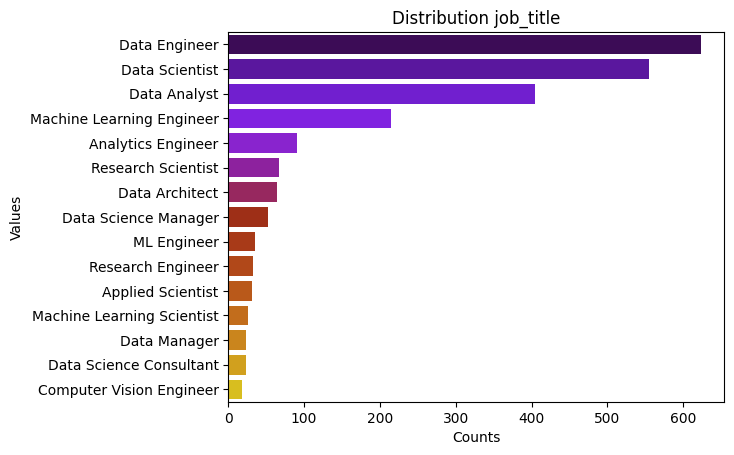

employee_residence
US    1900
GB     179
CA      88
IN      74
ES      54
DE      51
FR      40
PT      20
GR      20
BR      18
NL      16
AU      13
MX      11
PK       9
IE       8
Name: count, dtype: int64


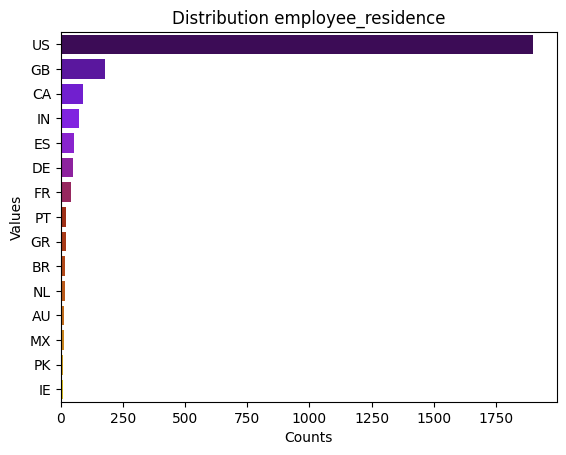

company_location
US    1936
GB     184
CA      90
DE      61
IN      61
ES      51
FR      35
GR      18
PT      16
AU      16
BR      15
NL      14
MX      11
IE       8
AT       7
Name: count, dtype: int64


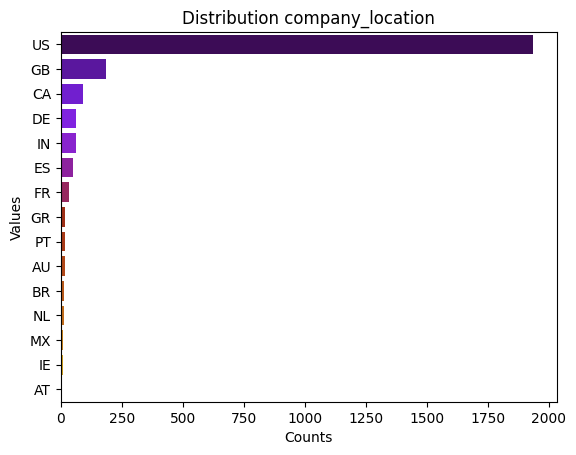

experience_level
Senior             1569
Mid_level           718
Entry_level         280
Executive_level     101
Name: count, dtype: int64


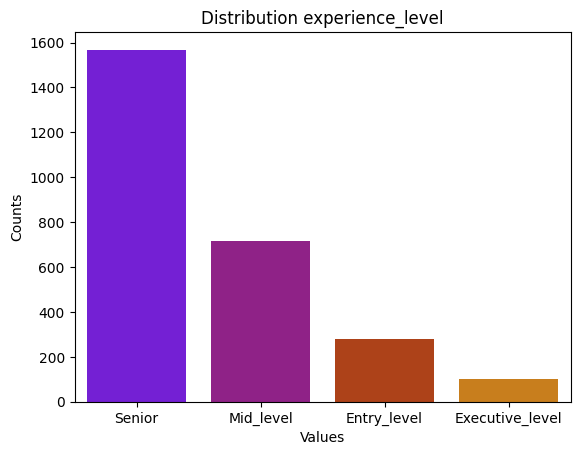

employment_type
Full_time      2629
Part_time        18
Contractual      11
Freelancer       10
Name: count, dtype: int64


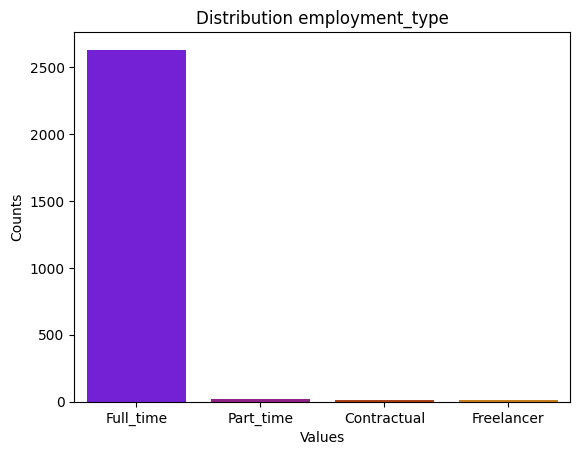

salary_currency
USD    2115
EUR     229
GBP     173
INR      63
CAD      32
AUD      11
PLN       6
BRL       6
SGD       6
CHF       5
JPY       3
DKK       3
HUF       3
TRY       3
MXN       2
Name: count, dtype: int64


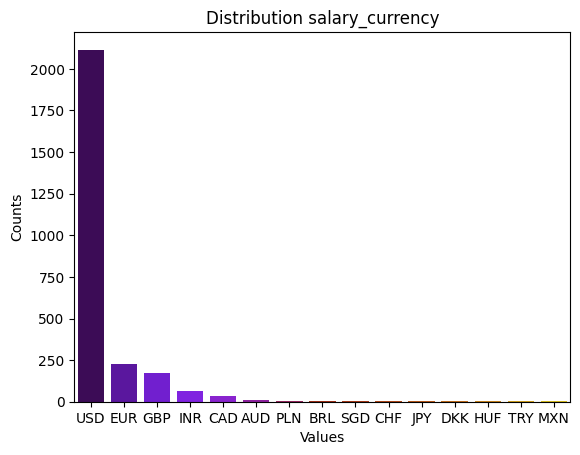

company_size
Medium    2084
Large      432
Small      152
Name: count, dtype: int64


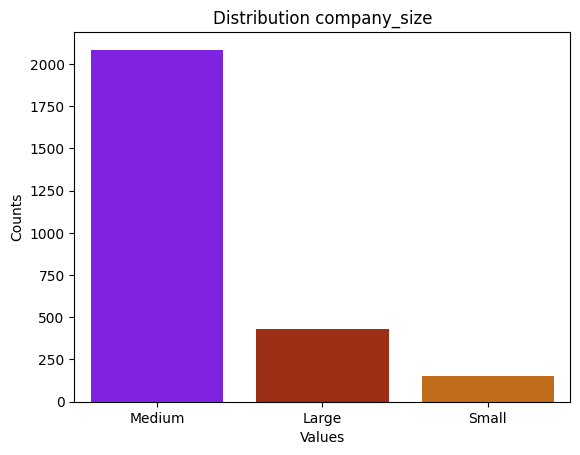

remote_ratio
Online          1260
Face-to-face    1212
Blended          196
Name: count, dtype: int64


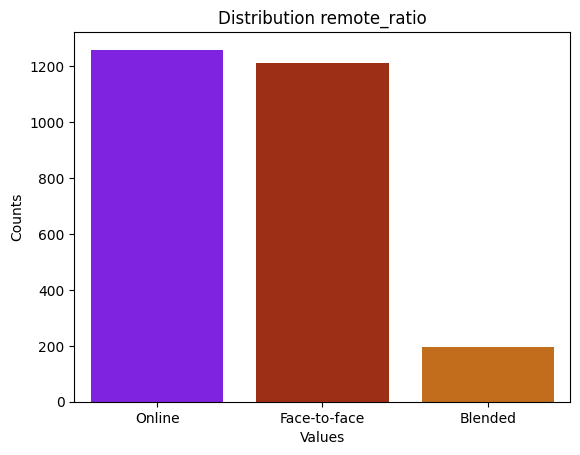

In [14]:
for v in categorical_vars_reverse:
    distribucio_variable(v, reverse = True)
for v in categorical_vars_non_reverse:
    distribucio_variable(v)

Distribució de variables numèriques:

work_year
2022    1196
2023    1156
2021     238
2020      78
Name: count, dtype: int64


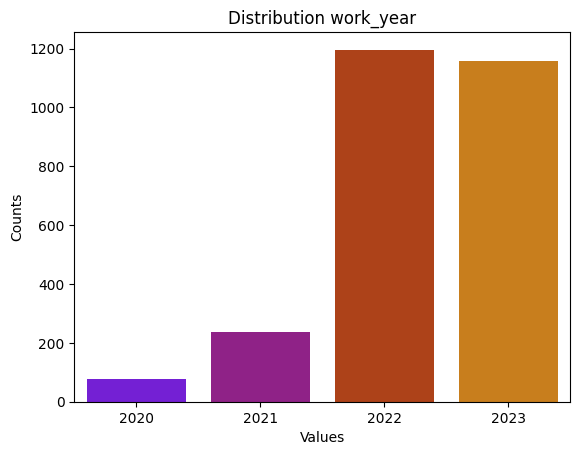

In [15]:
numeric_vars = list(df.select_dtypes(include=['int64']).columns)
numeric_vars_non_reverse = [v for v in numeric_vars if v != "salary"]
for v in numeric_vars_non_reverse:
    distribucio_variable(v)

Com podem observar en aquests histogrames hi ha atributs significativament representats davant d'altres, com poden ser:
- 'USD' a salary_currency
- 'US' a company_location
- 'US' a emplyee_residence
- 'full_time' a empoyment_type

Aquest desequilibri suggereix que les dades estan esbiaixades, ja que gran part de la població no estaria representada en aquestes dades. Això podria implicar que els models de regressió que construirem més endavant se sobreajustin a les dades dominants sense representar l'altra part de la població, dificultant la capacitat de generalitzar en els models, la qual cosa podria derivar en problemes d'overfitting.

### Salari mig

In [16]:
def average_salary_var(var, data = df, max_index = 15, reverse = False):
    average_salary = data.groupby(var)['salary'].mean()
    if len(average_salary) > max_index:
        average_salary = average_salary.head(max_index)
    average_salary = average_salary.sort_values(ascending=False)
    if reverse == True:
        sns.barplot(x=average_salary.values, y=average_salary.index,palette='gnuplot')
        plt.xlim(min(average_salary.values)-5000, max(average_salary.values)+1000)
        plt.xlabel('Average salary')
        plt.ylabel('Values')
    else:
        sns.barplot(x=average_salary.index, y=average_salary.values,palette='gnuplot')
        plt.ylim(min(average_salary.values)-5000, max(average_salary.values)+1000)
        plt.xlabel('Values')
        plt.ylabel('Average salary')
    plt.title(f'Average salary {v}')
    plt.show()

Salari mig per a totes les variables:

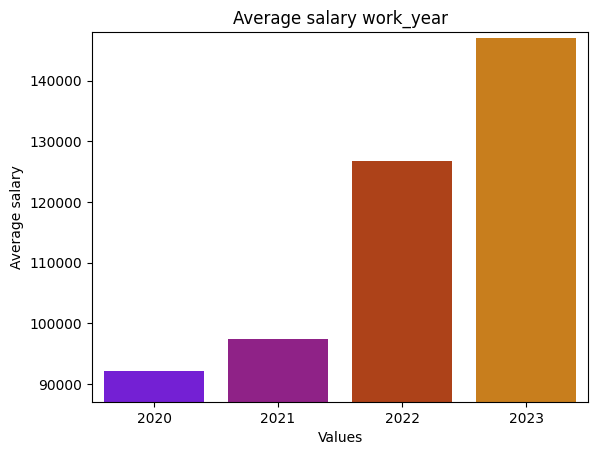

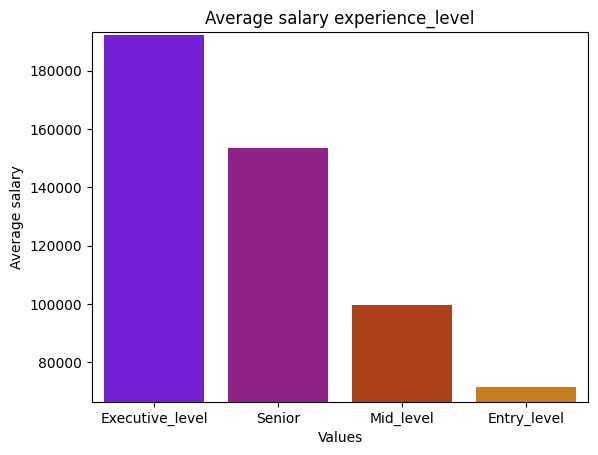

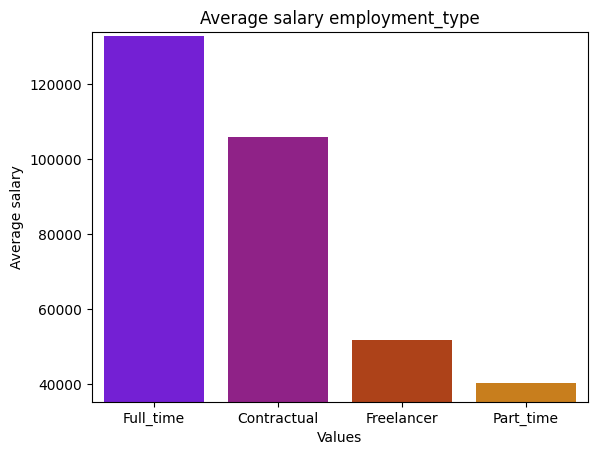

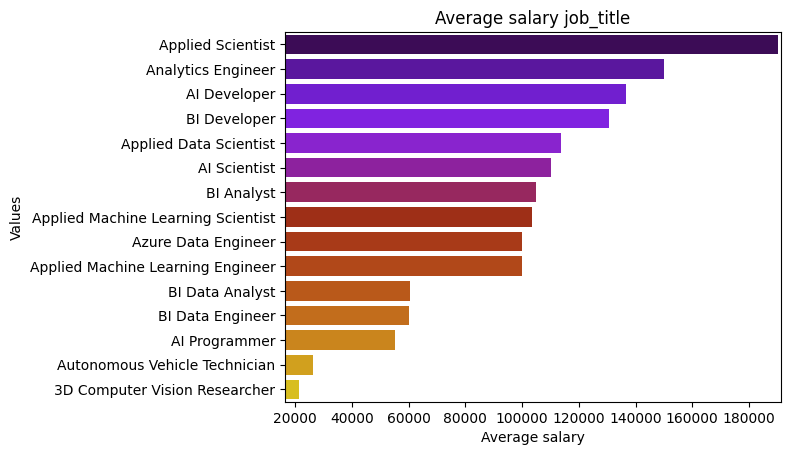

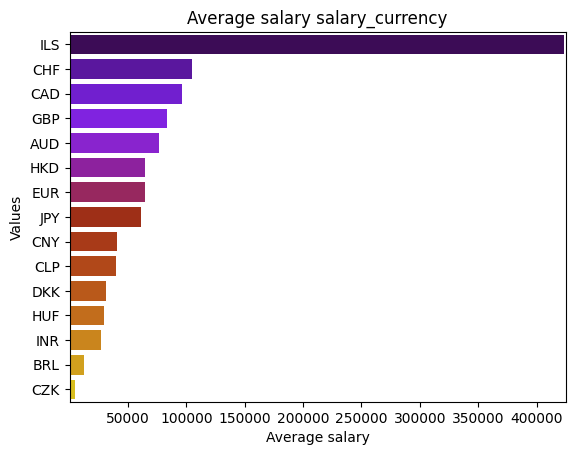

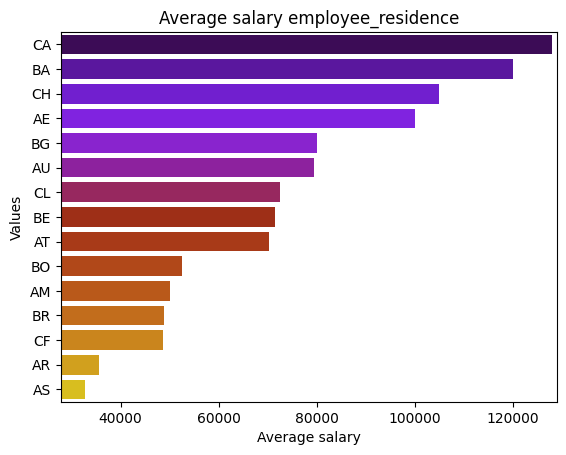

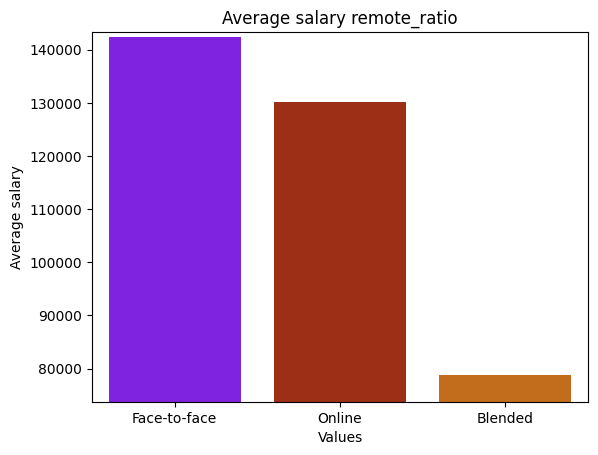

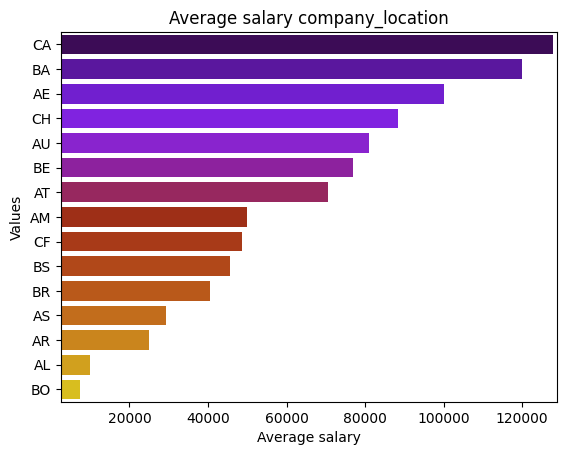

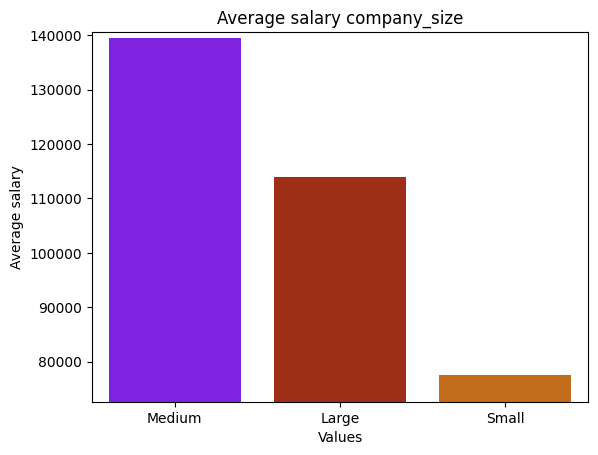

In [17]:
average_salary_vars = [v for v in df.columns if v != "salary"]
average_salary_vars_reverse = ["job_title", "salary_currency","employee_residence","company_location"]
for v in average_salary_vars:
    if v in average_salary_vars_reverse:
        average_salary_var(v, reverse = True)
    else:
        average_salary_var(v)

Com podem observar el salari mig varia molt dintre de les variables, podem observar com el salari mig a l'any 2023 sobrepassa els 140.000, en canvi, a l'any 2020 no arriba pas a 100.000, o com el salari mig en la moneda ILS (israelí) és de més de 400.00, i en canvi, cap de les altres arriba a 150.000 dolars. Encara no podem extreure cap conclusió pero podem suggerir hipotesis, com per exemple que les dades presenten outliers o que hi ha un desequilibri en la quantitat de dades de cada categoria.

## 3. Preprocessing

In [18]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full_time,Principal Data Scientist,EUR,85847,ES,Online,ES,Large
1,2023,Mid_level,Contractual,ML Engineer,USD,30000,US,Online,US,Small
2,2023,Mid_level,Contractual,ML Engineer,USD,25500,US,Online,US,Small
3,2023,Senior,Full_time,Data Scientist,USD,175000,CA,Online,CA,Medium
4,2023,Senior,Full_time,Data Scientist,USD,120000,CA,Online,CA,Medium


Un cop hem visualitzat els atributs i les nostres dades, és el moment d'aplicar mètodes per predir la nostra variable objectiu. Abans de començar amb aquesta part, cal tenir en compte que molts mètodes de predicció no poden treballar amb dades no numèriques. Per tant, per preparar correctament les dades per als nostres models, necessitem convertir totes les variables a numèriques. A continuació, veurem com convertir les dades categòriques a numèriques, utilitzant tècniques com l'encoding de les variables categòriques, per tal que les puguem utilitzar en el nostre model. 

### Dades categòriques a numèriques

Per convertir les dades a numèriques hem tingut en compte dos mètodes: LabelEncoding i TargetEncoding, One-Hot Encoding l'hem descartat perquè més endavant volem veure quins són els atributs més importants per poder millorar el teu salari, i amb aquest mètode perdríem les variables inicials, perquè es divideixen en múltiples variables. Finalment, ens hem decantat per TargetEncoding, pel fet que LabelEncoding assigna a cada categoria d'una variable un nombre enter (en experience_level Senior = 0, Mid_Level = 1...) el que podria suposar als mètodes una relació ordinal en les categories o jerarquies, de tal manera que els models interpretin una progressió quan no existeix. En canvi, aquest problema l'evitem clarament amb TargetEncoding, ja que substituïm pel valor mitjà del valor que volem predir per cada atribut, d'aquesta manera estem relacionant directament les variables categòriques amb la variable predictora.

In [19]:
### TargetEncoding
df_target_econding = df.copy()
for v in list(df_target_econding.select_dtypes(include=['object']).columns):
    mean_target = df_target_econding.groupby(v)['salary'].mean()
    df_target_econding[v] = df_target_econding[v].map(mean_target)

### Matriu de correlació

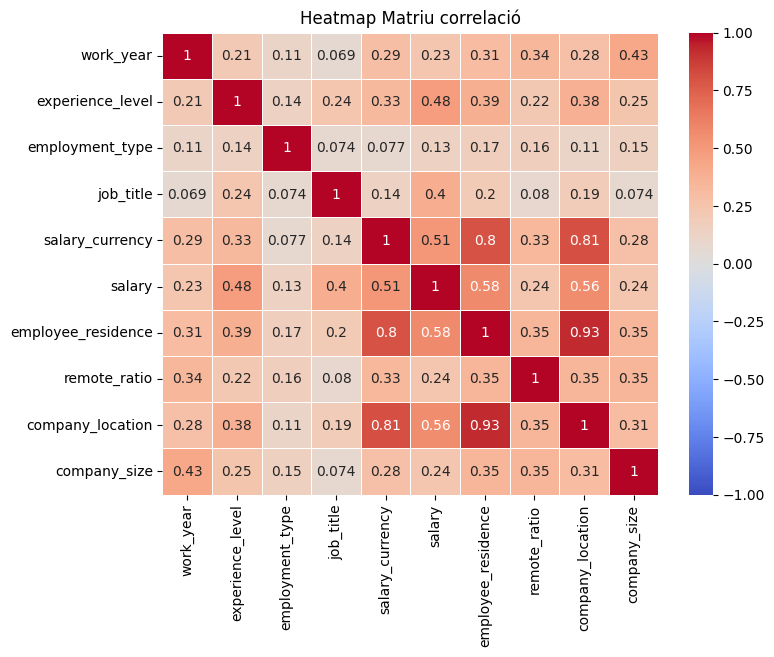

In [20]:
correlation_matrix = df_target_econding.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Heatmap Matriu correlació")
plt.show()

Com podem observar la variable 'salary' està força relacionada linealment amb les variables 'employee_residence' i 'company_location', on els coeficients de relació són 0.58 i 0.56 respectivament. Tot i això, no són les úniques variables que tenen un "alt" coeficient de relació amb el salari, també podem mencionar 'salary_currency' amb un 0.51 o 'experience_level' amb 0.48. És a dir, tenim coeficientes de correlació relativament alts, el que ens ajudarà a l'hora de crear regressors lineals.

Cal explicar que, encara que algunes variables mostrin un coeficient més baix, aquestes poden relacionar-se de manera no lineal en models més complexes i tenir una forta relació.

### Normalització de les dades

In [21]:
df_target_econding.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary,employee_residence,remote_ratio,company_location,company_size
0,2023,153518.460803,132926.591480,194227.000000,64430.218341,85847,62869.092593,130119.013492,58802.352941,113920.159722
1,2023,99670.491643,106031.272727,154456.171429,148758.260520,30000,154333.485789,130119.013492,152735.128616,77659.973684
2,2023,99670.491643,106031.272727,154456.171429,148758.260520,25500,154333.485789,130119.013492,152735.128616,77659.973684
3,2023,153518.460803,132926.591480,130961.149550,148758.260520,175000,128011.806818,130119.013492,127810.344444,139567.003839
4,2023,153518.460803,132926.591480,130961.149550,148758.260520,120000,128011.806818,130119.013492,127810.344444,139567.003839


En aquest cas, és molt important normalitzar les dades, ja que com podem observar tenim valors molt grans i les variables no es troben escalades. Això pot tenir un gran impacte en el rendiment de diversos models, un que utilitzarem: el k-Nearest Neighbors, perquè és un algoritme bassat en distàncies (si els nombres són molt grans pot interpretar que un valor està més lluny del que realment està).

In [22]:
from sklearn.preprocessing import StandardScaler

target_att = 'salary'
attributes = [k for k in df_target_econding.keys() if k != target_att]
X = df_target_econding[attributes]
y = df_target_econding[[target_att]]
sc = StandardScaler()
X_norm = sc.fit_transform(X)
y_norm = sc.fit_transform(y)

### Metric Selection

Per avaluar els models que utilitzarem a continuació, hem escollit l'r2 score, ja que ens permet observar si el model s'ha ajustat bé i quin percentatge de la variabilitat de la variable objectiu explica el model, a més és senzill d'interpretar, perquè és un valor entre el 0 i el 100, on el 100 és que el model explica tota la variabilitat de la variable a predir. En conclusió, l'r2 score ens ajuda a comparar el rendiment de diferents models de manera ràpida en intuïtiva.

## 4. Model Selection

A continuació, escollirem el model que millor s'ajusti a les nostres dades, abans hem seleccionat 5 regressors per comprar els seus rendiments, són els següents:
- Linear Regression
- XGBoost Regressor
- Random Forest Regressor
- Gradient Boosting Regressor
- KNeighbors Regressor

Per evitar línies de codi repetitives, definim les següents funcions:

#### Avaluar models

In [23]:
from sklearn.metrics import r2_score

def model_r2_scores(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    return [r2_train, r2_test]

#### Visualitzar prediccions

In [24]:
def visualize_predictions(model, X_train, y_train):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)

    y_pred = y_pred.flatten() 
    y_train = y_train.flatten()
    
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.scatter(y_train,y_pred)
    plt.plot(y_train,y_train,'--',c = 'red')
    plt.xlabel('Valors reals')
    plt.ylabel('Valors predits')

    plt.subplot(122)
    plt.scatter(y_train,y_pred-y_train)
    plt.xlabel('Valors reals')
    plt.ylabel('Error')
    plt.tight_layout()
    plt.show()

    plt.scatter(y_train,abs(y_pred-y_train))
    plt.xlabel('Valors reals')
    plt.ylabel('Mean Absolute Error')
    plt.show()

#### Definim els regressors en un diccionari

In [25]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

random_state = 50
regressors = {'LinearRegression':LinearRegression(),
              'XGB':XGBRegressor(random_state=random_state),
              'RandomForestRegressor':RandomForestRegressor(random_state=random_state),
              'GrandientBoostingRegressor':GradientBoostingRegressor(),
              'KNRegressor': KNeighborsRegressor()
             }

#### Definim els conjunts de train i test

In [26]:
from sklearn.model_selection import train_test_split

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=test_size, random_state=random_state)

Evaluem els nostres models:

In [27]:
for r in regressors.keys():
    r2_scores = model_r2_scores(regressors[r], X_train, X_test, y_train, y_test)
    r2_train = r2_scores[0]
    r2_test = r2_scores[1]
    print(f"{r}: r2_train = {r2_train:.2f} r2_test = {r2_test:.2f}")

LinearRegression: r2_train = 0.49 r2_test = 0.42
XGB: r2_train = 0.67 r2_test = 0.42
RandomForestRegressor: r2_train = 0.66 r2_test = 0.43
GrandientBoostingRegressor: r2_train = 0.57 r2_test = 0.44
KNRegressor: r2_train = 0.53 r2_test = 0.40


Dels 5 mètodes que hem seleccionat, com podem observar, obtenim problema de overfitting en 4 d'ells, l'unic en el que no és en la regressió lineal, que de totes maneres es un r2 score baix pel que nosaltres volem.

Anem a veure què ha passat amb la funció visualize_predictions:

LinearRegression:


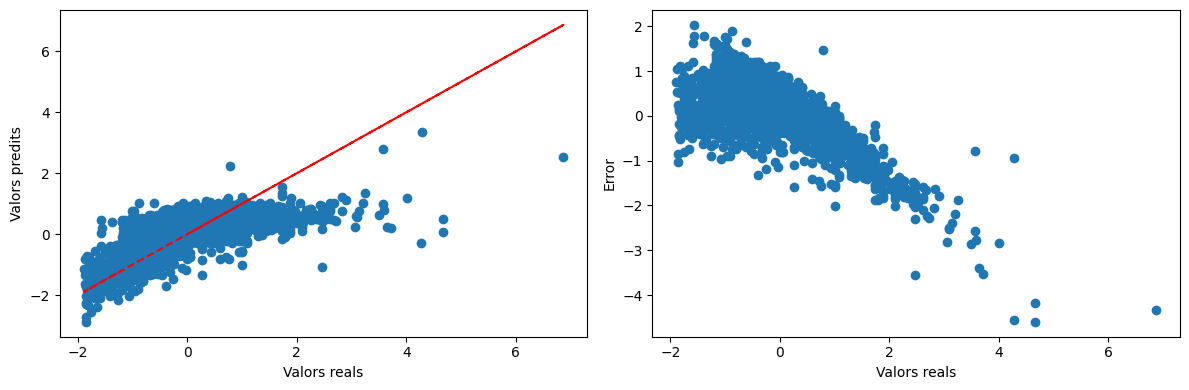

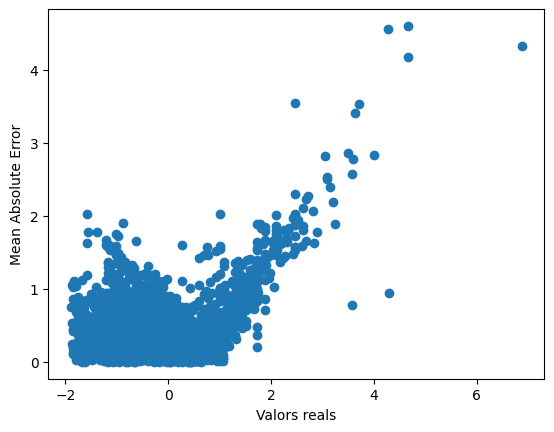

XGB:


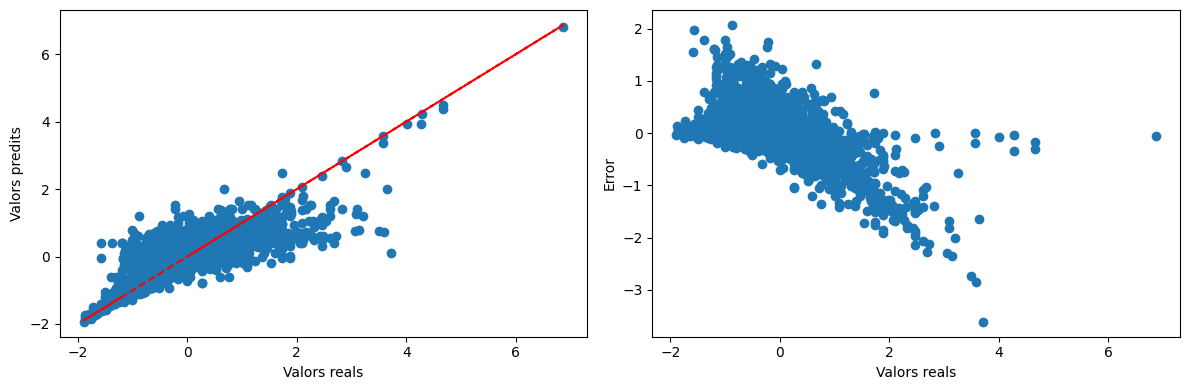

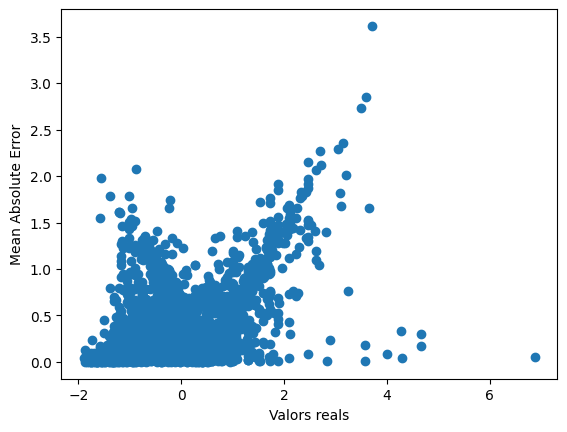

RandomForestRegressor:


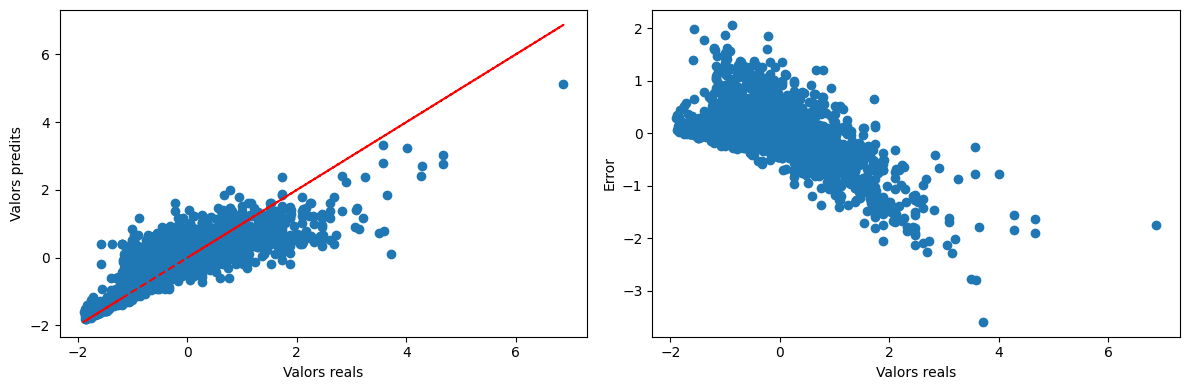

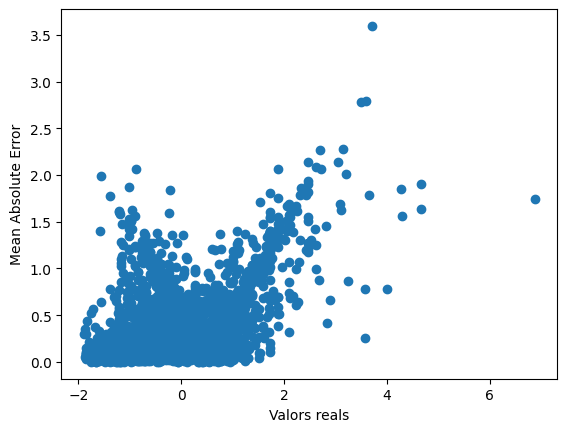

GrandientBoostingRegressor:


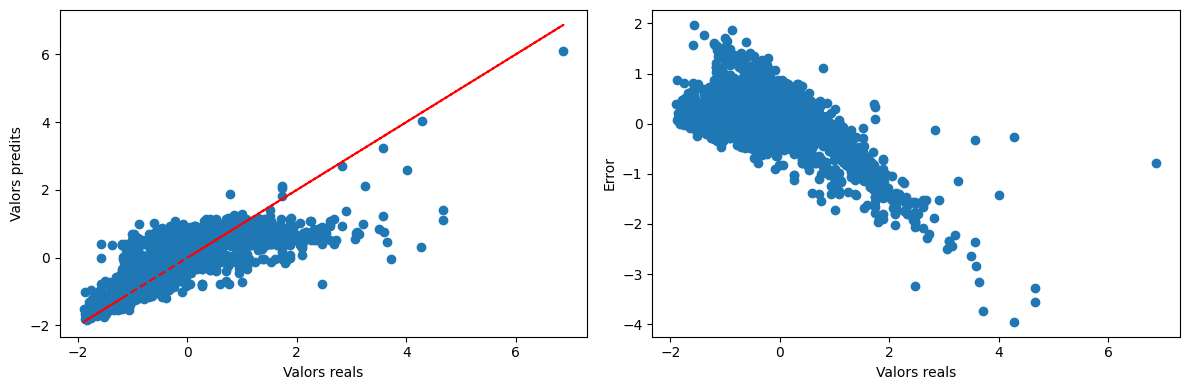

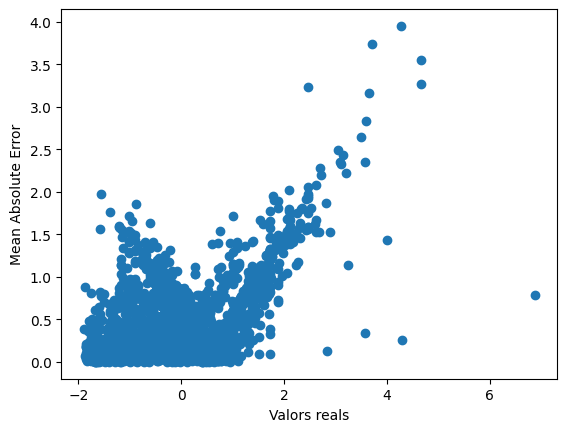

KNRegressor:


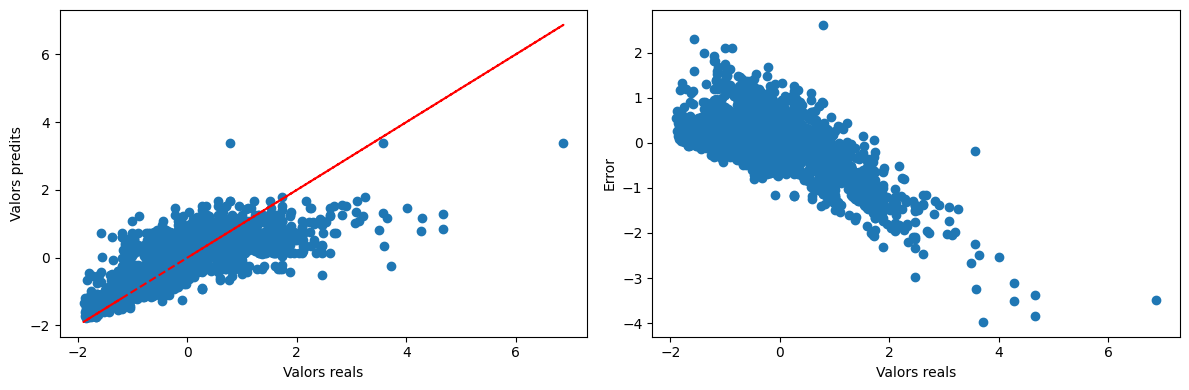

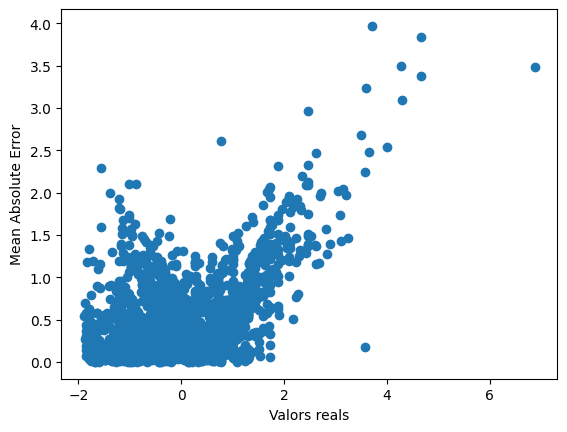

In [28]:
for r in regressors.keys():
    print(f"{r}:")
    visualize_predictions(regressors[r], X_train, y_train)

Com podem observar amb les gràfiques, els models s'ajusten bé per a valors de salari baixos, a mesura que augmentem el salari es veu clarament amb les gràfiques de l'error i del Mean Absolute Error que l'error augmenta significativament.

Al prinicpi, hem vist que el salari màxim és de 600.000, el mínim de 2.859 i el percentil del 75% és de 173.000. Aleshores el 75% de les dades estàn concentrades en un interval molt més petit [2.859, 173.000] que el 25% restant [173.000, 600.000]. 

Per poder solucionar el problema d'arribar a overfitting a la majoria de models, no ens centrarem en salaris a partir de 200.000. D'aquesta manera, reduïm l'impacte dels valors extrems en els nostres anàlisis i permetem que els models es concentren en la gran majoria de les dades. D'aquesta manera també podrem evitar que es sobreajusti als valors atípics que poden no ser representatius del conjunt global de dades.

#### Eliminem les dades que el salari està per sobre de 200.000:

In [29]:
salary_max = 200000
df_target_econding = df_target_econding[df_target_econding['salary'] <= salary_max]
print(f"Nombre d'entrades: {df_target_econding.shape[0]}, obviem {df.shape[0]-df_target_econding.shape[0]} entades.")
df_target_econding.describe()

Nombre d'entrades: 2290, obviem 378 entades.


,work_year,experience_level,employment_type,job_title,salary_currency,salary,employee_residence,remote_ratio,company_location,company_size
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2022.247598,128595.415053,131739.301335,129424.603905,129047.707121,112786.274236,128470.921212,131239.896293,128790.388059,131287.818286
std,0.756106,33079.889881,9875.087322,26293.694568,36537.618859,49320.608401,40838.605977,16752.851744,39656.558117,16999.778981
min,2020.000000,71514.417857,40390.555556,5409.000000,5132.000000,2859.000000,6304.000000,78746.617347,6304.000000,77659.973684
25%,2022.000000,99670.491643,132926.591480,109241.000000,148758.260520,75000.000000,86535.893855,130119.013492,87938.885246,139567.003839
50%,2022.000000,153518.460803,132926.591480,130961.149550,148758.260520,115000.000000,154333.485789,130119.013492,152735.128616,139567.003839
75%,2023.000000,153518.460803,132926.591480,139743.595907,148758.260520,150000.000000,154333.485789,142319.444719,152735.128616,139567.003839
max,2023.000000,192252.930693,132926.591480,328333.333333,148758.260520,200000.000000,200000.000000,142319.444719,271446.500000,139567.003839


#### Normalitzem de nou i fem splits

In [30]:
target_att = 'salary'
attributes = [k for k in df_target_econding.keys() if k != target_att]
X = df_target_econding[attributes]
y = df_target_econding[[target_att]]
sc = StandardScaler()
X_norm = sc.fit_transform(X)
y_norm = sc.fit_transform(y)

In [31]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=test_size, random_state=random_state)

#### Avaluem els models amb aquesta variació a les entrades

Precisions abans:
- Linear Regression: r2_train = 0.49 r2_test = 0.42
- XGB: r2_train = 0.67 r2_test = 0.42
- Random Forest Regressor: r2_train = 0.66 r2_test = 0.43
- Grandient Boosting Regressor: r2_train = 0.57 r2_test = 0.44
- KN Regressor: r2_train = 0.53 r2_test = 0.40

In [32]:
for r in regressors.keys():
    r2_scores = model_r2_scores(regressors[r], X_train, X_test, y_train, y_test)
    r2_train = r2_scores[0]
    r2_test = r2_scores[1]
    print(f"{r}: r2_train = {r2_train:.2f} r2_test = {r2_test:.2f}")

LinearRegression: r2_train = 0.55 r2_test = 0.59
XGB: r2_train = 0.73 r2_test = 0.57
RandomForestRegressor: r2_train = 0.72 r2_test = 0.58
GrandientBoostingRegressor: r2_train = 0.62 r2_test = 0.61
KNRegressor: r2_train = 0.59 r2_test = 0.49


Hem millorat l'r2 score de tots els models pero en la majoria seguim amb problemes d'overfitting.

Veiem les gràfiques:

LinearRegression:


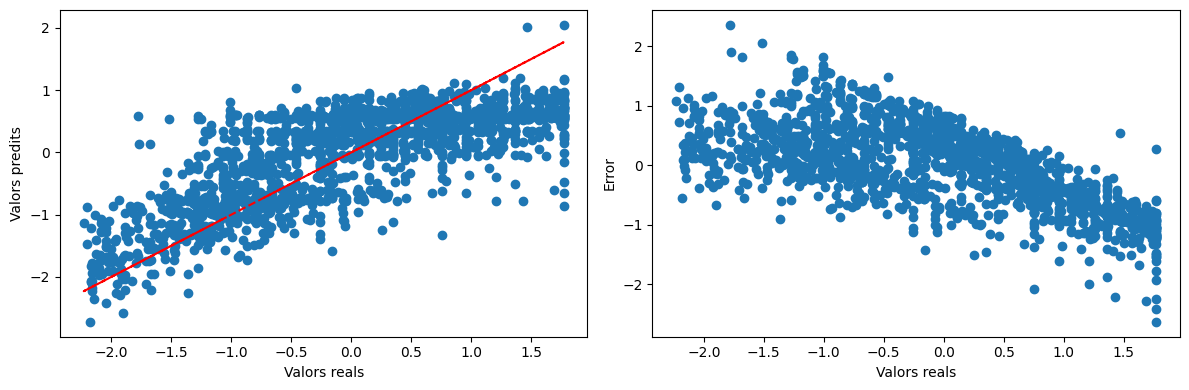

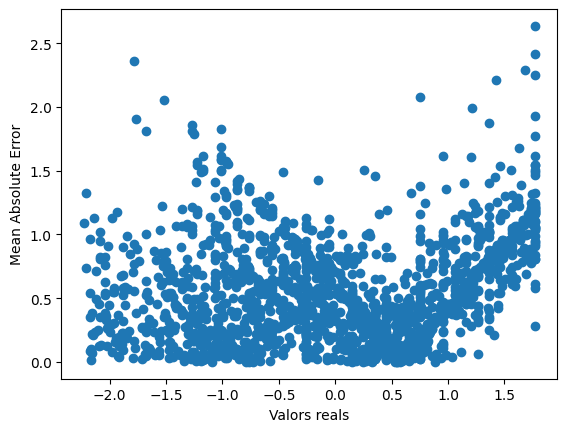

XGB:


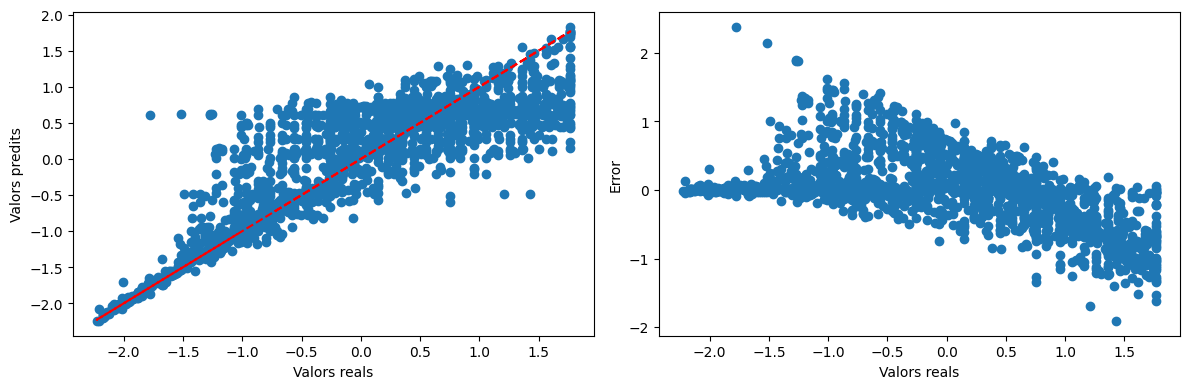

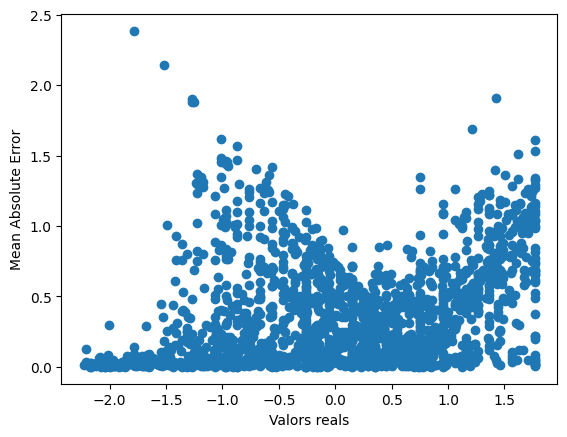

RandomForestRegressor:


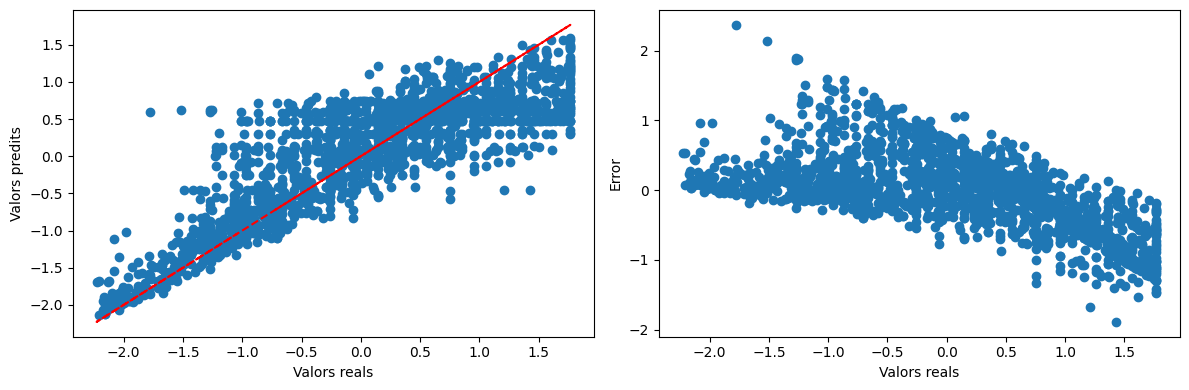

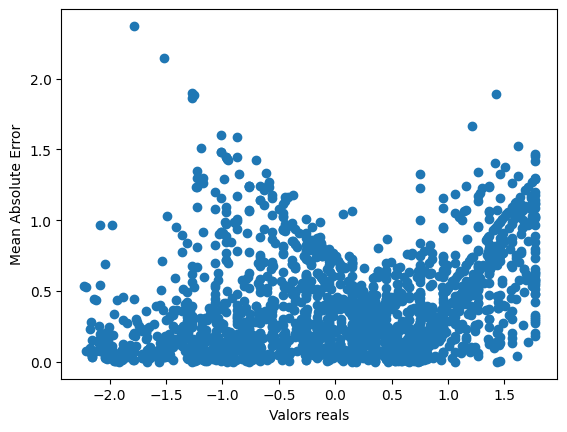

GrandientBoostingRegressor:


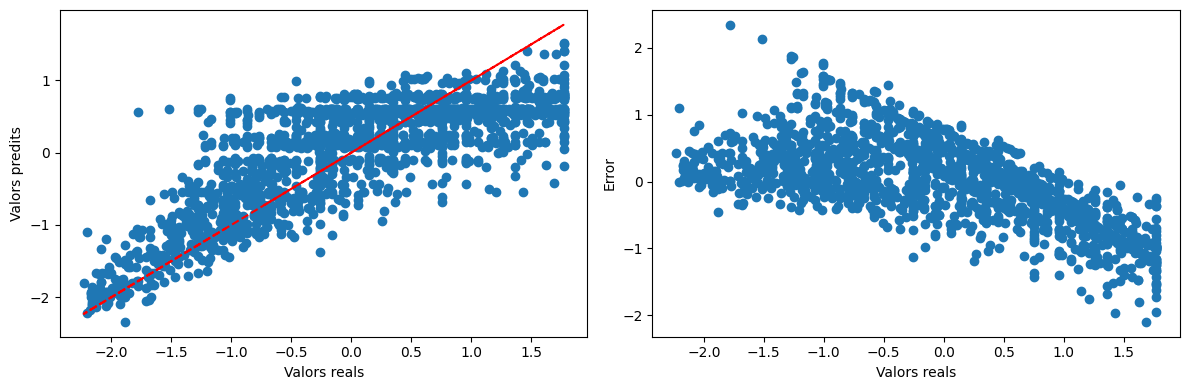

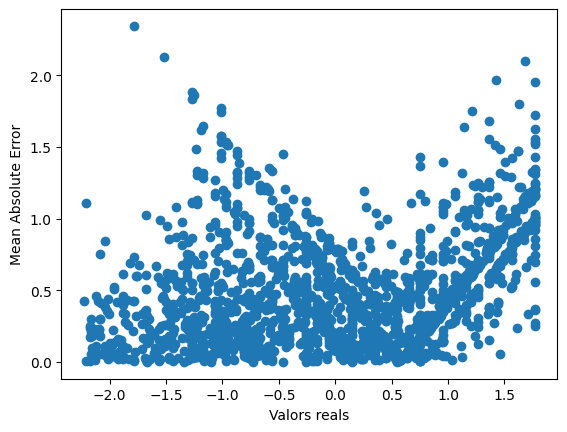

KNRegressor:


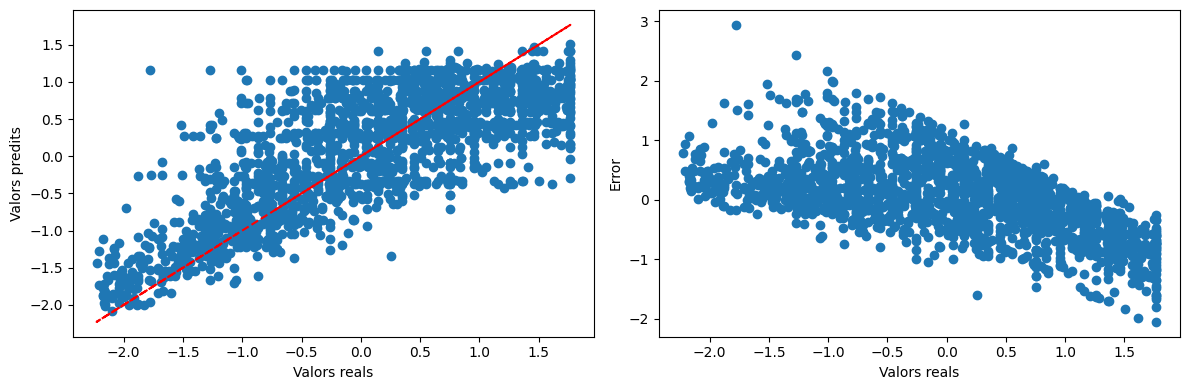

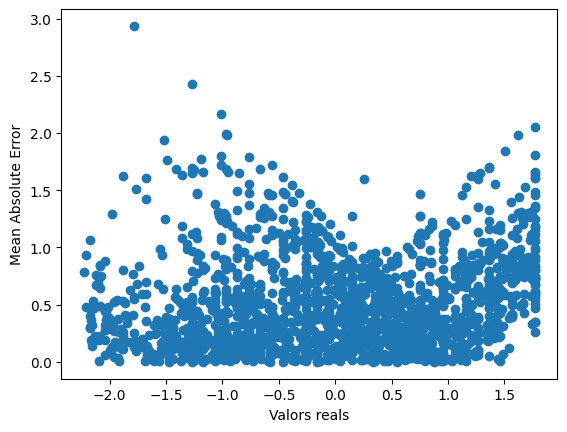

In [33]:
for r in regressors.keys():
    print(f"{r}:")
    visualize_predictions(regressors[r], X_train, y_train)

Com podem observar a les gràfiques, hi ha una tendencia a augmentar l'error, igual que abans, als salaris grans. Continuarem disminuint el valor màxim de salari per veure com varien l'r2 score dels models. Més endavant, visualitzarem amb una curva com varia la precisió per a cada model a mesura que disminuïm el valor màxim de salari, per trobar un equilibri entre precisió i nombre d'elements.

Definim funcions:

A partir d'un dataset que calculi totes les r2 scores de tots els mètodes:

In [34]:
def all_methods(data):
    target_att = 'salary'
    attributes = [k for k in data.keys() if k != target_att]
    X = data[attributes]
    y = data[[target_att]]
    sc = StandardScaler()
    X_norm = sc.fit_transform(X)
    y_norm = sc.fit_transform(y)
    test_size = 0.2
    random_state = 50

    X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=test_size, random_state=random_state)

    r2_train_scores = {'LinearRegression': [], 'XGB': [], 'RandomForestRegressor': [], 'GrandientBoostingRegressor': [], 'KNRegressor': []}
    r2_test_scores = {'LinearRegression': [], 'XGB': [], 'RandomForestRegressor': [], 'GrandientBoostingRegressor': [], 'KNRegressor': []}

    for n1, model in regressors.items():
        r2_train, r2_test = model_r2_scores(model, X_train, X_test, y_train, y_test)
        r2_train_scores[n1].append(r2_train)
        r2_test_scores[n1].append(r2_test)
    return r2_train_scores, r2_test_scores

Curva per veure com varia la precisió variant nombre d'entrades:

In [35]:
def curve_r2(count_values, salary_values, r2_scores, name):
    max_index = r2_scores.index(max(r2_scores))
    max_count = count_values[max_index]
    max_r2 = r2_scores[max_index]
    max_salary = salary_values[max_index]

    plt.figure(figsize=(15,7))
    plt.plot(count_values, r2_scores)
    plt.scatter(max_count, max_r2, color='red', label=f"Max R2 ({max_count}, {max_r2:.2f})")
    plt.xlabel("Max value salary")
    plt.ylabel("R2 score")
    plt.title(f"R2 score {name}")
    plt.legend()
    plt.grid()
    plt.show()
    print(f"El valor màxim s'assoleix al dataset de max_salary = {max_salary}")

Decrementem el valor màxim del salari de 200.000 fins a 100.000 de 5.000 en 5.000 per veure com actuen els mètodes:

In [36]:
from sklearn.model_selection import cross_val_score

r2_train_all = {'LinearRegression': [], 'XGB': [], 'RandomForestRegressor': [], 'GrandientBoostingRegressor': [], 'KNRegressor': []}
r2_test_all = {'LinearRegression': [], 'XGB': [], 'RandomForestRegressor': [], 'GrandientBoostingRegressor': [], 'KNRegressor': []}
r2_cross_val = {'LinearRegression': [], 'XGB': [], 'RandomForestRegressor': [], 'GrandientBoostingRegressor': [], 'KNRegressor': []}

values = np.arange(200000, 99999, -5000)
number_entries = []
df_act = df_target_econding.copy()
for val_max in values:
    df_act = df_act[df_act['salary'] <= val_max]
    number_entries.append(df_act.shape[0])
    r2_train_scores, r2_test_scores = all_methods(df_act)

    target_att = 'salary'
    attributes = [k for k in df_act.keys() if k != target_att]
    X = df_act[attributes]
    y = df_act[[target_att]]
    X_norm = sc.fit_transform(X)
    y_norm = sc.fit_transform(y)

    for n1 in regressors.keys():
        r2_train_all[n1].append(r2_train_scores[n1][0])
        r2_test_all[n1].append(r2_test_scores[n1][0])
        r2_cross_val[n1].append(cross_val_score(regressors[n1], X_norm, y_norm, cv = 10, scoring='r2').mean())

Visualitzem els resultats:

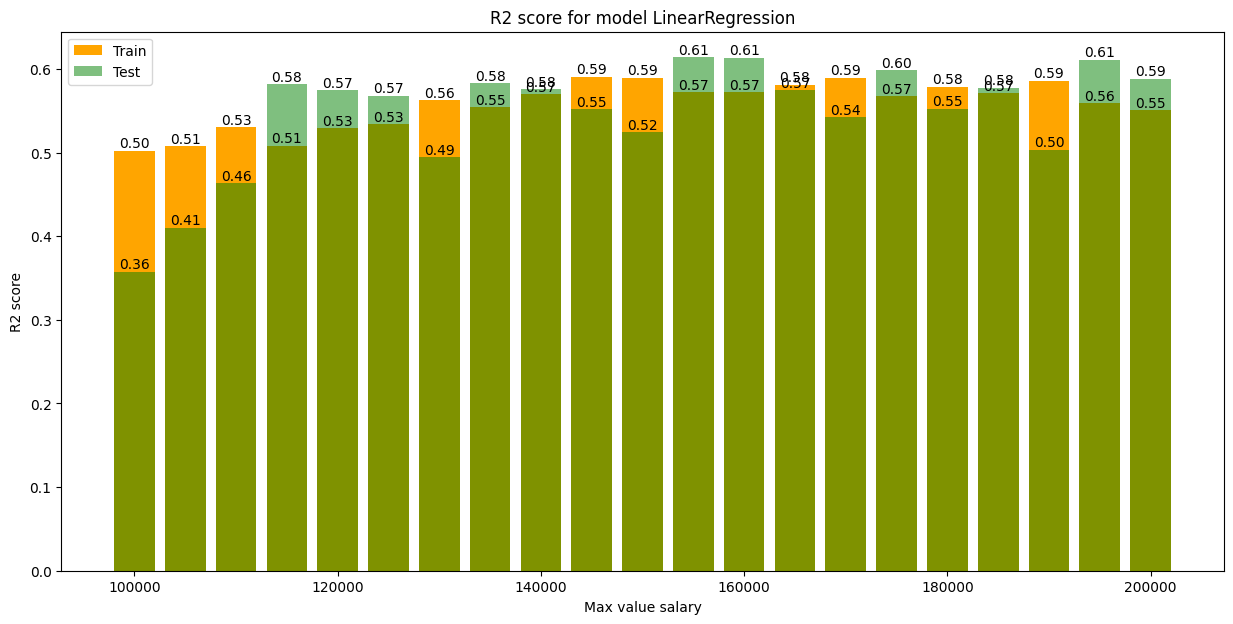

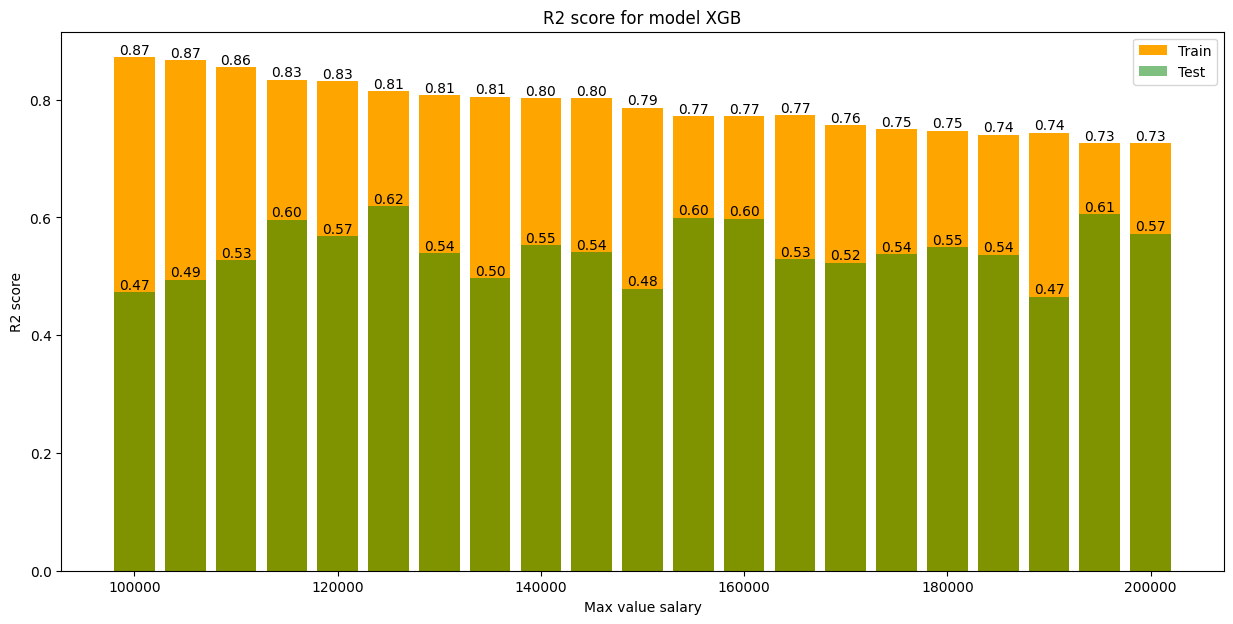

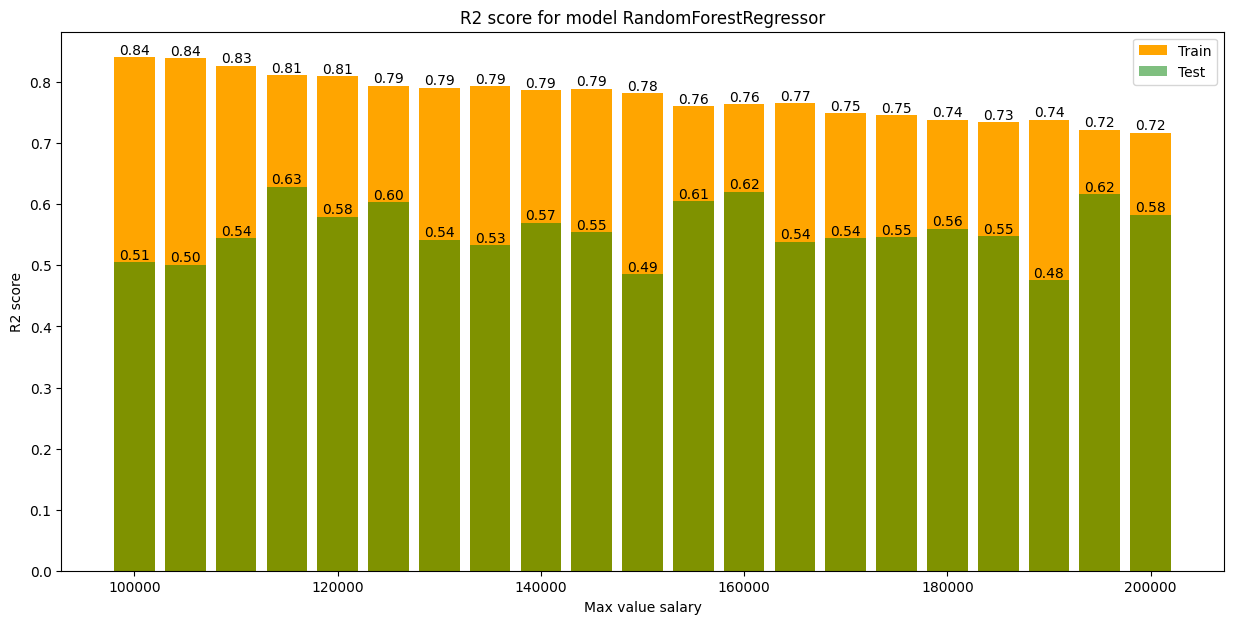

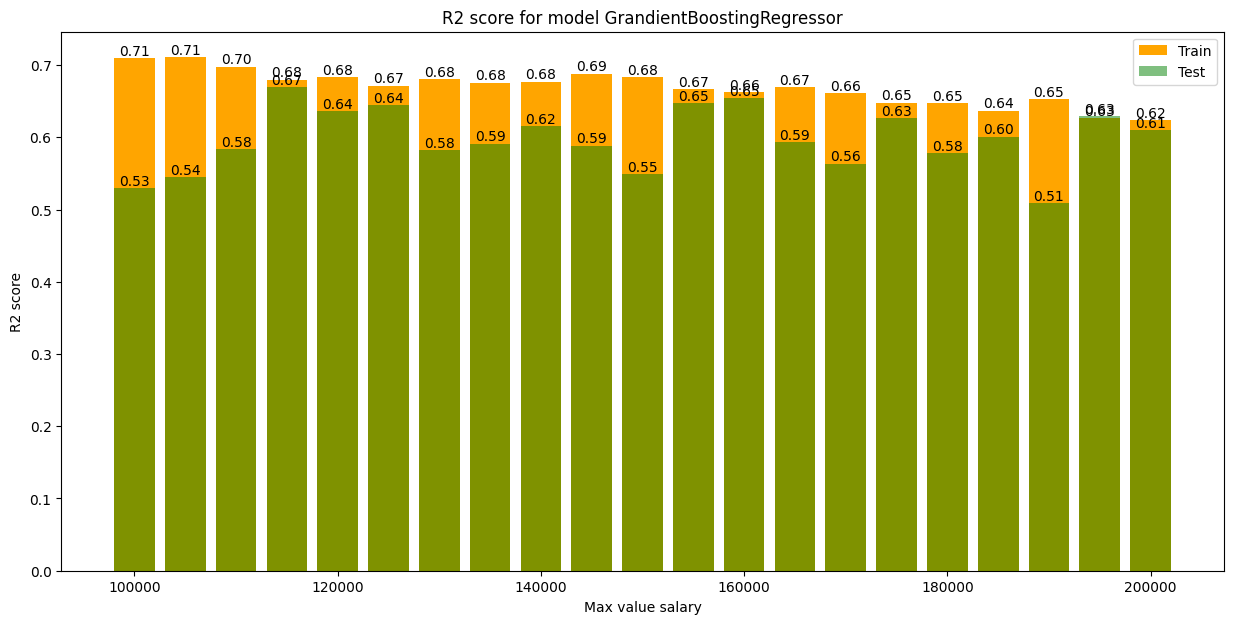

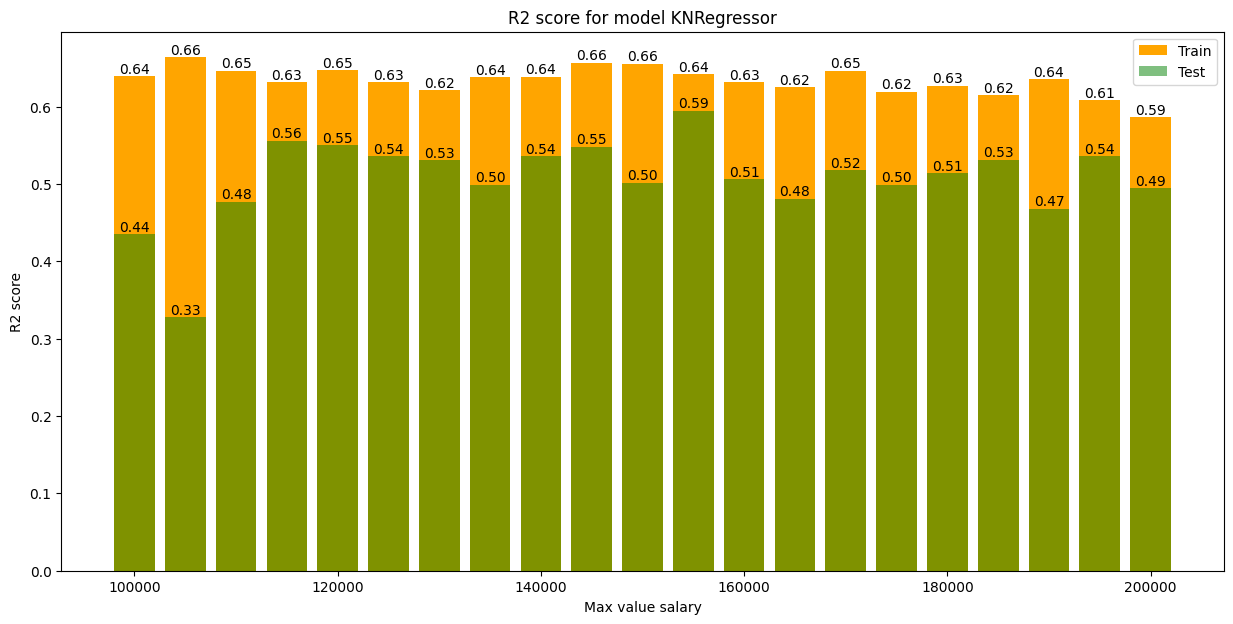

In [37]:
bar_width = 4000
for i, model in enumerate(r2_train_all.keys()):
    plt.figure(figsize=(15,7))
    plt.bar(x=values, height=r2_train_all[model], label = "Train", alpha =1, color = "orange", width=bar_width)
    plt.bar(x=values, height=r2_test_all[model], label = "Test", alpha = 0.5, color = "green", width=bar_width)
    plt.title(f'R2 score for model {model}')
    plt.xlabel('Max value salary')
    plt.ylabel('R2 score')
    for j, value in enumerate(r2_train_all[model]):
        plt.text(values[j], value, f'{value:.2f}', ha='center', va='bottom', color='black', fontsize=10)
    for j, value in enumerate(r2_test_all[model]):
        plt.text(values[j], value, f'{value:.2f}', ha='center', va='bottom', color='black', fontsize=10)
    plt.legend()
    plt.show()

Després de visualitzar els resultats obtinguts variant el valor màxim de salari, descartem dos mètodes: XGBoost i Random Forest Regressor, ja que per aquestes dades amb aquests models estem arribant sempre a overfitting, en canvi, amb els altres tres models obtenim bons resultats, els millors són els següents (tenen el següent format: (max_value_salary, r2_score_train, r2_score_test)):
- Linear Regression: (200.000, 0.55, 0.59), (195.000, 0.56, 0.61), (185.000, 0.57, 0.58), (175.000, 0.57, 0.60), (165.000, 0.58, 0.57)...
- Gradient Boosting Regression: (200.000, 0.62, 0.61), (195.000, 0.63, 0.63), (175.000, 0.65, 0.63), (160.000, 0.66, 0.65), (155.000, 0.67, 0.65)...
- KNearest Regressor: (155.000, 0.64, 0.59)

A continuació, veurem com varia l'r2_score a mesura que variem el max_value salary en una gràfica, per calcular el r2_score hem fet servir cross validation:

In [38]:
regressors = {'LinearRegression':LinearRegression(),
              'GrandientBoostingRegressor':GradientBoostingRegressor(),
              'KNRegressor': KNeighborsRegressor()
             }

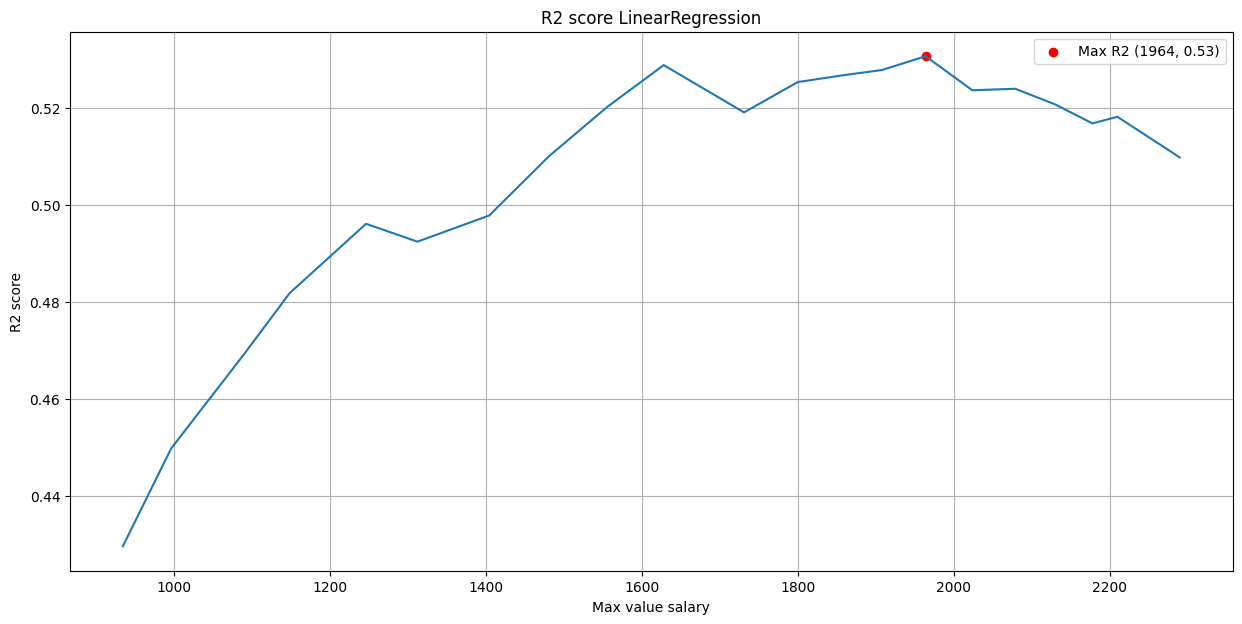

El valor màxim s'assoleix al dataset de max_salary = 170000


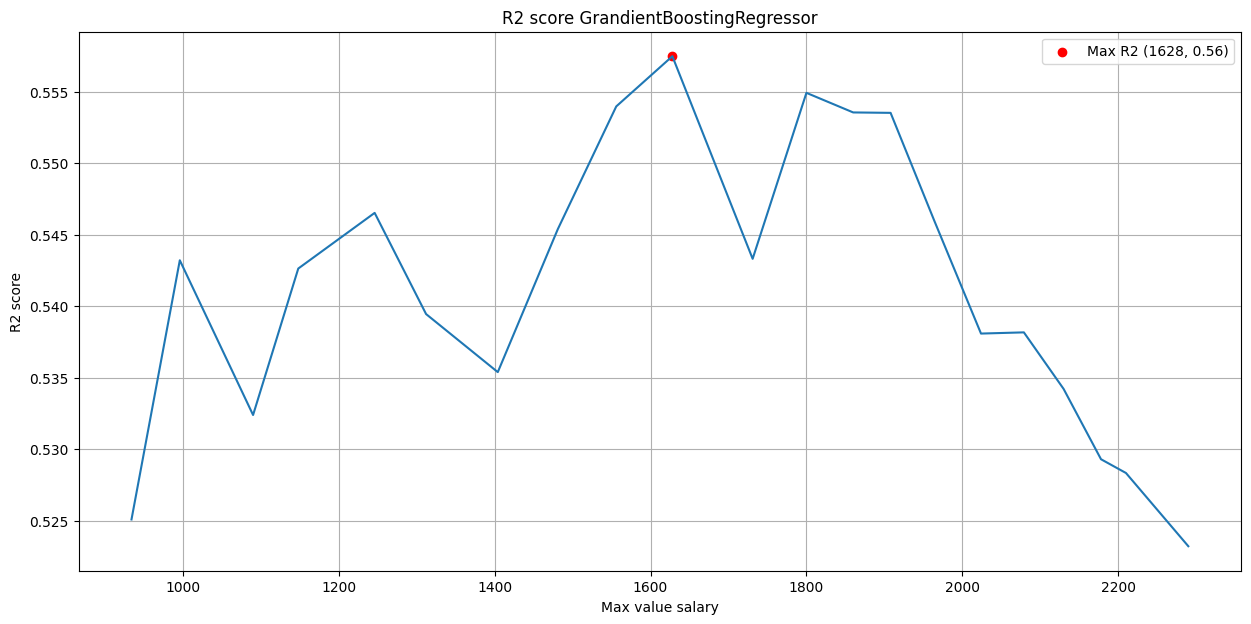

El valor màxim s'assoleix al dataset de max_salary = 145000


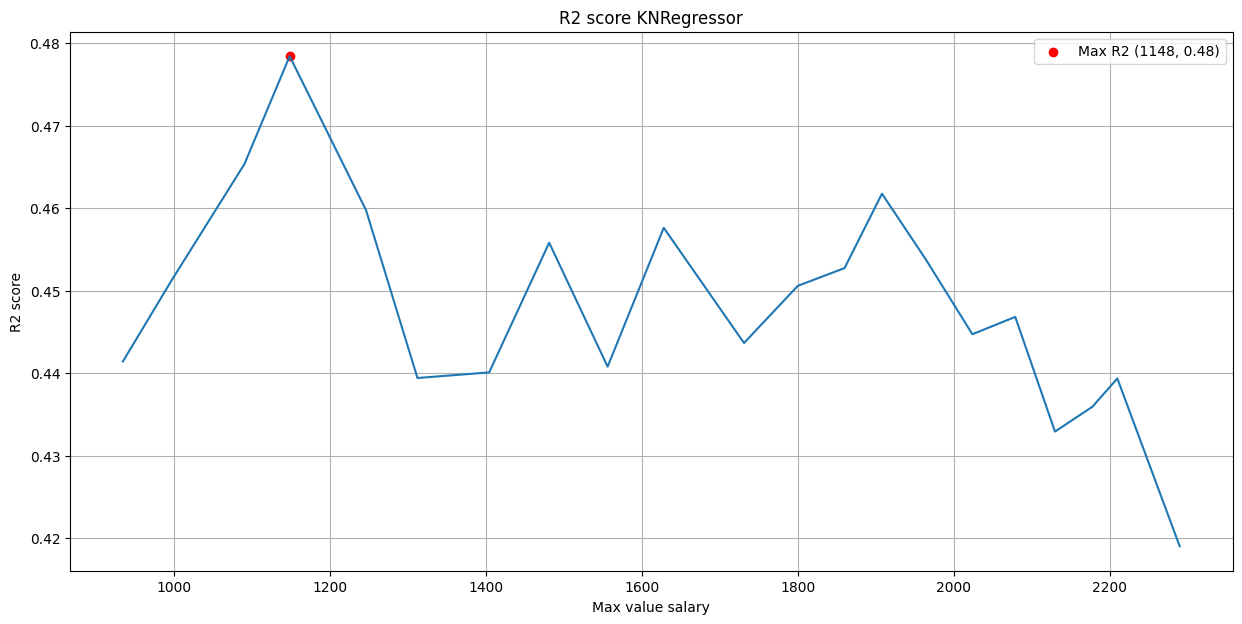

El valor màxim s'assoleix al dataset de max_salary = 115000


In [39]:
for n1 in regressors.keys():
    curve_r2(number_entries, values, r2_cross_val[n1], n1)

Seleccionem el millor dataset per a cada model, tenint en compte el r2_score calculat amb cross validation, el nombre d'entrades que perdem i els histogrames visualitzats.

#### Millor dataset per Linear Regression

Pels histogrames podem veure que les scores no varien molt fins que no arribem (cap enrere) a un salary màxim de 120.000 i de fet la gràfica ens diu el mateix. Concloïm que ens quedem amb el punt màxim obtingut a la gràfica, és a dir amb el dataset on el màxim salari és 170.000.

In [40]:
salary_max_lr = 170000
df_lr = df_target_econding.copy()
df_lr = df_lr[df_lr['salary'] <= salary_max_lr]
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1964 entries, 0 to 4341
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           1964 non-null   int64  
 1   experience_level    1964 non-null   float64
 2   employment_type     1964 non-null   float64
 3   job_title           1964 non-null   float64
 4   salary_currency     1964 non-null   float64
 5   salary              1964 non-null   int64  
 6   employee_residence  1964 non-null   float64
 7   remote_ratio        1964 non-null   float64
 8   company_location    1964 non-null   float64
 9   company_size        1964 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 168.8 KB


#### Millor dataset per Gradient Boosting Regressor

Tot i que pel Gradient Boosting el màxim a la curva l'assolim per 145.000, seleccionarem el dataset on el salari màxim és 195.000 ja que l'escala de la curva en aquest gràfic és molt petita, i hi ha una diferència de 0.03 entre aquests scores, i d'aquesta manera no perdem tanta informació.

In [41]:
salary_max_gbr = 195000
df_gbr = df_target_econding.copy()
df_gbr = df_gbr[df_gbr['salary'] <= salary_max_gbr]
df_gbr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2210 entries, 0 to 4341
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           2210 non-null   int64  
 1   experience_level    2210 non-null   float64
 2   employment_type     2210 non-null   float64
 3   job_title           2210 non-null   float64
 4   salary_currency     2210 non-null   float64
 5   salary              2210 non-null   int64  
 6   employee_residence  2210 non-null   float64
 7   remote_ratio        2210 non-null   float64
 8   company_location    2210 non-null   float64
 9   company_size        2210 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 189.9 KB


#### Millor dataset per KN Regressor

De la mateixa manera que pel Gradient Boosting, no ens quedarem amb el dataset del millor r2 score de la curva, gràcies als histogrames observem que és molt interessant quan el salari màxim és 155.000, ja que és el dataset on la diferència de r2 score al train i test és més petita i són valors significants, i si observem la curva tenim un r2 score del 0.49 amb cros validation, és a dir, perdem una mica de score però guanyem variabilitat.

In [42]:
salary_max_knr = 155000
df_knr = df_target_econding.copy()
df_knr = df_knr[df_knr['salary'] <= salary_max_knr]
df_knr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1800 entries, 0 to 4341
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           1800 non-null   int64  
 1   experience_level    1800 non-null   float64
 2   employment_type     1800 non-null   float64
 3   job_title           1800 non-null   float64
 4   salary_currency     1800 non-null   float64
 5   salary              1800 non-null   int64  
 6   employee_residence  1800 non-null   float64
 7   remote_ratio        1800 non-null   float64
 8   company_location    1800 non-null   float64
 9   company_size        1800 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 154.7 KB


In [43]:
datasets = {'LinearRegression':df_lr,
            'GrandientBoostingRegressor':df_gbr,
            'KNRegressor': df_knr
           }

#### Afegim nous datasets seleccionant les millors variables

Definim la següent funció per fer selected features:

In [44]:
from sklearn.feature_selection import SelectFromModel

def select_important_features(model, data, threshold='mean'):
    target_att = 'salary'
    attributes = [k for k in data.keys() if k != target_att]
    X = data[attributes]
    y = data[[target_att]]
    X_norm = sc.fit_transform(X)
    y_norm = sc.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=test_size, random_state=random_state)
    model.fit(X_train, y_train)
    if hasattr(model, 'feature_importances_'):
        selector = SelectFromModel(model, threshold=threshold, prefit=True)
        mask = selector.get_support()
    elif hasattr(model, 'coef_'):
        selector = SelectFromModel(model, threshold=threshold, prefit=True)
        mask = selector.get_support()
    else:
        print(f" --- El model {model.__class__.__name__} no suporta selecció de característiques. S'afageixen totes les variables---")
        mask = np.ones(X_norm.shape[1], dtype=bool)

    selected_attributes = np.array(attributes)[mask]
    X_norm_selected = X_norm[:, mask] if isinstance(X_norm, np.ndarray) else X_norm.loc[:, mask]

    X_selected_df = pd.DataFrame(X_norm_selected, columns=selected_attributes, index=data.index)
    dataset_selected = pd.concat([X_selected_df, y], axis=1)

    return dataset_selected, mask

Apliquem als datasets que tenim la funció select_important_features() per generar un nou dataset per cada model:

In [45]:
for n1, model in regressors.items():
    print(f"Seleccionant característiques per model {n1}")
    data_selected, mask = select_important_features(model, datasets[n1])
    datasets[f"{n1}_SF"] = data_selected

Seleccionant característiques per model LinearRegression
Seleccionant característiques per model GrandientBoostingRegressor
Seleccionant característiques per model KNRegressor
 --- El model KNeighborsRegressor no suporta selecció de característiques. S'afageixen totes les variables---


Comparem els models pel millor dataset escollit anteriorment i el selected features:

In [46]:
r2_train_comp = {'LinearRegression' : [], 'GrandientBoostingRegressor' : [], 'KNRegressor' : []}
r2_test_comp = {'LinearRegression' : [], 'GrandientBoostingRegressor' : [], 'KNRegressor' : []}

for n1 in datasets.keys():
    regr_key = n1
    if "_SF" in regr_key:
        regr_key = regr_key.replace("_SF", "")
    target_att = 'salary'
    attributes = [k for k in datasets[n1].keys() if k != target_att]
    X = datasets[n1][attributes]
    y = datasets[n1][[target_att]]
    X_norm = sc.fit_transform(X)
    y_norm = sc.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=test_size, random_state=random_state)

    r2_train, r2_test = model_r2_scores(regressors[regr_key], X_train, X_test, y_train, y_test)
    r2_train_comp[regr_key].append(r2_train)
    r2_test_comp[regr_key].append(r2_test)

Visualitzem els resultats:

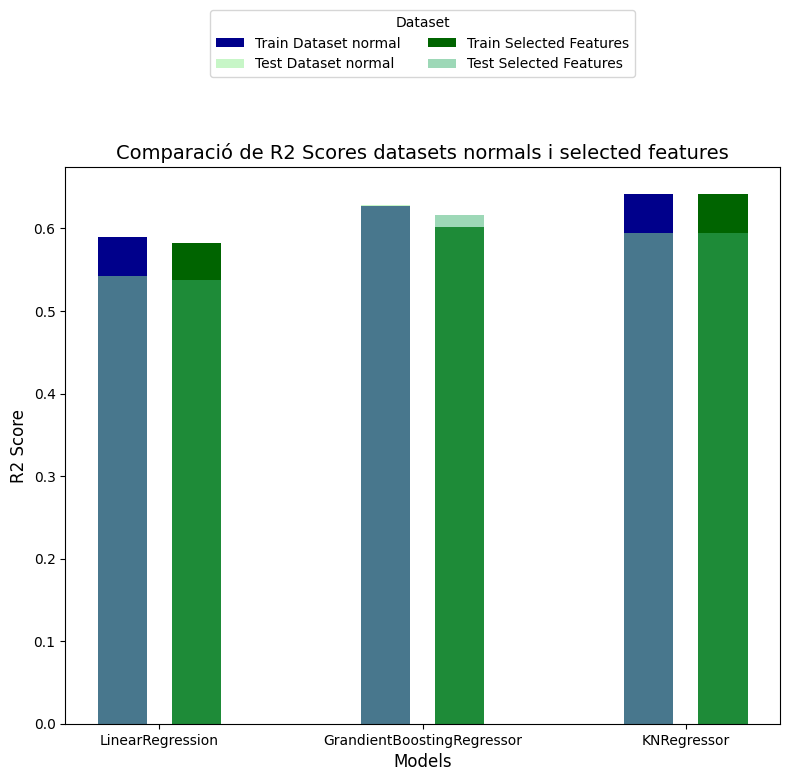

In [47]:
bar_width = 0.15
separation_factor = 0.8
positions = np.arange(len(r2_train_comp.keys())) * separation_factor

fig, ax = plt.subplots(figsize=(8, 8))

for i, n1 in enumerate(r2_train_comp.keys()):
    r2_train_score = r2_train_comp[n1][0]
    r2_test_score = r2_test_comp[n1][0]
    r2_train_sf_score = r2_train_comp[n1][1]
    r2_test_sf_score = r2_test_comp[n1][1]

    ax.bar(positions[i] - 0.75 * bar_width, r2_train_score, alpha =1, color = "darkblue", width=bar_width, label='Train Dataset normal')
    ax.bar(positions[i] - 0.75 * bar_width, r2_test_score, width=bar_width, label=f'Test Dataset normal', alpha = 0.5, color = "lightgreen")
    ax.bar(positions[i] + 0.75 * bar_width, r2_train_sf_score, alpha =1, color = "darkgreen", width=bar_width, label=f'Train Selected Features')
    ax.bar(positions[i] + 0.75 * bar_width, r2_test_sf_score, width=bar_width, label=f'Test Selected Features', alpha = 0.5, color = "mediumseagreen")

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('R2 Score', fontsize=12)
ax.set_title('Comparació de R2 Scores datasets normals i selected features', fontsize=14)

ax.set_xticks(positions)
ax.set_xticklabels(r2_train_comp.keys(), rotation=0, fontsize=10)

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title='Dataset', bbox_to_anchor=(0.5, 1.15), loc='lower center', ncol=2, fontsize=10)

# Ajustar el diseño
plt.tight_layout()

In [48]:
del datasets['KNRegressor_SF']
datasets.keys()

dict_keys(['LinearRegression', 'GrandientBoostingRegressor', 'KNRegressor', 'LinearRegression_SF', 'GrandientBoostingRegressor_SF'])

Podem veure clarament que els datasets tenen comportaments pràcticament idèntics, en el cas del KNRegressor és així ja que no suportava el mètode de selecció de característiques, aleshores, ara elimnarem aquest dataset perquè a continuació farem una cerca d'hiperparàmetres i seria una pèrdua de temps fer-la dos vegades.

In [57]:
import time
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold, GridSearchCV

def hyperparameters_search(params_grid, datasets, cv_splits=10, score = 'r2'):
    """
        classifier: model 
        param_grids: diccionari de parámetres per fer cerca dels millors
        data: X_norm
        y_data: y_norm
        cv_splits: splits pel kFols
    """
    kfold = KFold(n_splits=cv_splits, random_state=random_state, shuffle=True)
    if score == 'r2':
        scoring = make_scorer(r2_score)
    else:
        scoring = score  
    results = []
    for data in datasets.keys():
        print(f"Cercant hyperparameters {data}")
        regr_key = data
        if "_SF" in regr_key:
            regr_key = regr_key.replace("_SF", "")

        target_att = 'salary'
        attributes = [k for k in datasets[data].keys() if k != target_att]
        X = datasets[data][attributes]
        y = datasets[data][[target_att]]
        sc = StandardScaler()
        X_norm = sc.fit_transform(X)
        y_norm = sc.fit_transform(y)
        model = regressors[regr_key]
        X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_norm, y_norm, test_size=test_size, random_state=random_state)

        start_time = time.time()
        gs = GridSearchCV(estimator=model, param_grid=params_grid[regr_key], cv=kfold, scoring=scoring, n_jobs=-1)
        gs.fit(X_norm, y_norm)
        cv_results = gs.cv_results_
        best_index = gs.best_index_
        mean_r2_best_model = cv_results['mean_test_score'][best_index]
        best_params = gs.best_params_
        end_time = time.time()  
        calc_time = end_time - start_time 
        results.append({
                'Dataset': data,
                'Classifier': regr_key,
                'Mean Test Score (R2)': mean_r2_best_model,
                'Execution Time (s)': calc_time,  
                'Best Parameters': best_params,
                'Best Estimator': gs.best_estimator_  
            })
        model.set_params(**best_params)
        model.fit(X_norm_train, y_norm_train)
        y_train_pred = model.predict(X_norm_train)
        y_test_pred = model.predict(X_norm_test)
        r2_train = r2_score(y_norm_train, y_train_pred)
        r2_test = r2_score(y_norm_test, y_test_pred)
        print(f'Dataset: {dataset_name}, Classifier: {type(model).__name__}, r2 train: {r2_train:.4f}, r2 test: {r2_test:.4f}, r2_average: {mean_r2_best_model:.4f}, time = {calc_time}')
    return pd.DataFrame(results)

In [55]:
lr_param_grid = {'fit_intercept': [True, False],           
                 'copy_X': [True, False],                  
                 'positive': [True, False] }
kn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 15],      
                 'weights': ['uniform', 'distance'],        
                 'p': [1, 2],                               
                 'leaf_size': [20, 30, 40],                 
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
                 'metric': ['minkowski', 'euclidean', 'manhattan'], 
                 'n_jobs': [-1]}
gbr_param_grid = {'learning_rate': [0.05, 0.1],  
                  'n_estimators': [100, 150],   
                  'max_depth': [3, 5],            
                  'min_samples_split': [2, 5],    
                  'subsample': [0.8, 1.0],
                  'min_samples_leaf': [1, 2],    
                  'max_features': ['auto', 'sqrt'],  
                  'loss': ['ls', 'huber']         
                 }

param_grid_list = {'LinearRegression' : lr_param_grid,
                   'GrandientBoostingRegressor' : gbr_param_grid,
                   'KNRegressor' : kn_param_grid}

In [58]:
final_result = hyperparameters_search(param_grid_list, datasets)
final_result

Cercant hyperparameters LinearRegression
Dataset: ds_salaries, Classifier: LinearRegression, r2 train: 0.5891, r2 test: 0.5449, r2_average: 0.5774s, time = 0.08831119537353516
Cercant hyperparameters GrandientBoostingRegressor
Dataset: ds_salaries, Classifier: GradientBoostingRegressor, r2 train: 0.6631, r2 test: 0.6386, r2_average: 0.5912s, time = 77.82049107551575
Cercant hyperparameters KNRegressor
Dataset: ds_salaries, Classifier: KNeighborsRegressor, r2 train: 0.5992, r2 test: 0.6001, r2_average: 0.5610s, time = 27.467870712280273
Cercant hyperparameters LinearRegression_SF
Dataset: ds_salaries, Classifier: LinearRegression, r2 train: 0.5826, r2 test: 0.5378, r2_average: 0.5720s, time = 0.09717845916748047
Cercant hyperparameters GrandientBoostingRegressor_SF
Dataset: ds_salaries, Classifier: GradientBoostingRegressor, r2 train: 0.6122, r2 test: 0.6171, r2_average: 0.5657s, time = 80.86121678352356


,Dataset,Classifier,Mean Test Score (R2),Execution Time (s),Best Parameters,Best Estimator
0,LinearRegression,LinearRegression,0.577363,0.088311,"{'copy_X': True, 'fit_intercept': False, 'posi...","LinearRegression(fit_intercept=False, positive..."
1,GrandientBoostingRegressor,GrandientBoostingRegressor,0.591207,77.820491,"{'learning_rate': 0.05, 'loss': 'huber', 'max_...",([DecisionTreeRegressor(criterion='friedman_ms...
2,KNRegressor,KNRegressor,0.561024,27.467871,"{'algorithm': 'brute', 'leaf_size': 20, 'metri...","KNeighborsRegressor(algorithm='brute', leaf_si..."
3,LinearRegression_SF,LinearRegression,0.571975,0.097178,"{'copy_X': True, 'fit_intercept': False, 'posi...","LinearRegression(fit_intercept=False, positive..."
4,GrandientBoostingRegressor_SF,GrandientBoostingRegressor,0.565720,80.861217,"{'learning_rate': 0.05, 'loss': 'huber', 'max_...",([DecisionTreeRegressor(criterion='friedman_ms...


Finalment, concloïm que el millor model és el GradientBoostinRegressor per al dataset que té com a salari màxim 195.000, obtenint un r2 score de mitjana del 0.59 i al train i test 0.66 i 0.63 respectivament.

Aquest baix resultat es pot explicar pel conjunt de dades reduït (aproximadament 2000) i la distribució polaritzada de la gran majoria de les variables. El nombre baix d'entrades més les distribucions d'aquesta fa que els models tinguin dificultats per generalitzar, pels casos menys representats. Això limita el rendiment, ja que els atributs més comuns dominen l'aprenentatge mentre que els menys freqüents aporten poca informació. Una proposta per millorar aquest resultat obtingut seria afegir noves dades als datasets per tal d'evitar aquests problemes.